# <center> Handwritten Digit Recognition Model </center>

## haar Wavelet Transform

Applying wavelet transform with 'haar'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8616 - loss: 0.4662 - val_accuracy: 0.9722 - val_loss: 0.0879
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9766 - loss: 0.0756 - val_accuracy: 0.9777 - val_loss: 0.0750
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9829 - loss: 0.0547 - val_accuracy: 0.9747 - val_loss: 0.0791
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9813 - val_loss: 0.0547
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9823 - val_loss: 0.0587
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9909 - loss: 0.0275 - val_accuracy: 0.9859 - val_loss: 0.0421
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9924 - loss: 0.0225 - val_accuracy: 0.9871 - val_loss: 0.0429
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━

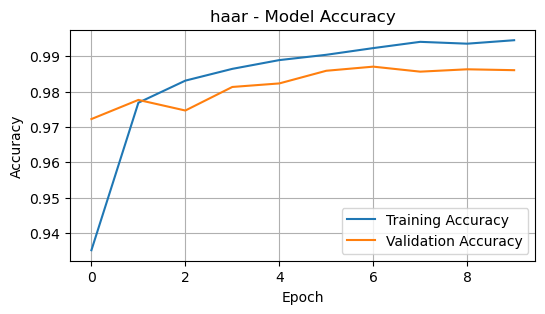

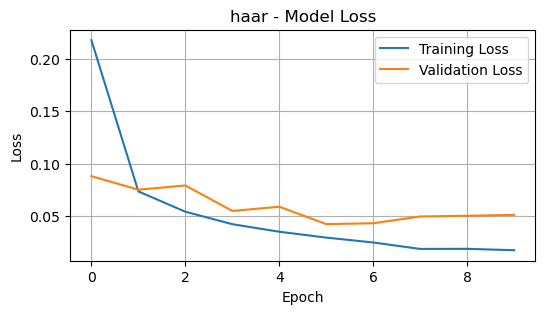

  Wavelet  Accuracy  Precision    Recall  F1 Score
0    haar    0.9875    0.98762  0.987341  0.987446


In [3]:
import numpy as np
import pandas as pd
import pywt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Perform wavelet transform on the images
def apply_wavelet_transform(images, wavelet_func):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, wavelet_func)
        LL, (LH, HL, HH) = coeffs2
        transformed_images.append(LL)
    return np.array(transformed_images)

discrete_wavelets = [
    'haar'
]

# Create lists to store results
wavelet_results = []
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

for wavelet_func in discrete_wavelets:
    print(f"Applying wavelet transform with '{wavelet_func}'...")
    x_train_transformed = apply_wavelet_transform(x_train, wavelet_func)
    x_test_transformed = apply_wavelet_transform(x_test, wavelet_func)

    # Normalize data
    x_train_transformed = x_train_transformed.astype('float32') / 255.0
    x_test_transformed = x_test_transformed.astype('float32') / 255.0

    # Step 2: Design CNN architecture
    model = Sequential([
        Input(shape=(x_train_transformed.shape[1], x_train_transformed.shape[2], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Step 3: Train the model
    history = model.fit(x_train_transformed, y_train, epochs=10, validation_split=0.2)

    # Step 4: Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_transformed, y_test, verbose=0)

    # Step 5: Calculate additional metrics
    y_pred_prob = model.predict(x_test_transformed)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results in lists
    wavelet_results.append(wavelet_func)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(6, 3))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{wavelet_func} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(6, 3))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{wavelet_func} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

# Create DataFrame from the results
results_df = pd.DataFrame({
    'Wavelet': wavelet_results,
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1 Score': f1_results
})

# Print the results table
print(results_df)


## dmey Wavelet Transform

Applying wavelet transform with 'dmey'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9039 - loss: 0.3039 - val_accuracy: 0.9875 - val_loss: 0.0445
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9858 - loss: 0.0455 - val_accuracy: 0.9860 - val_loss: 0.0468
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9931 - loss: 0.0205 - val_accuracy: 0.9907 - val_loss: 0.0309
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9907 - val_loss: 0.0340
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.9838 - val_loss: 0.0664
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━

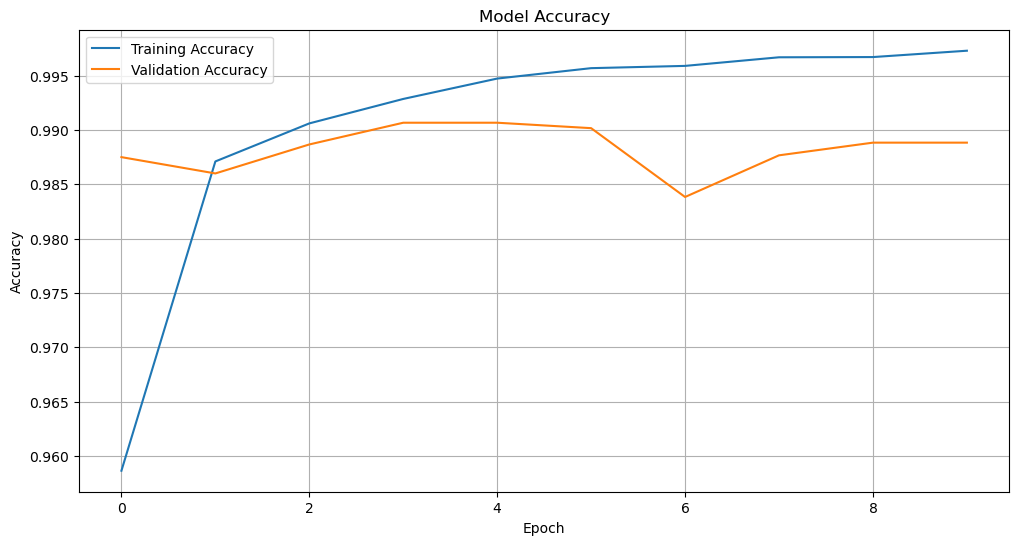

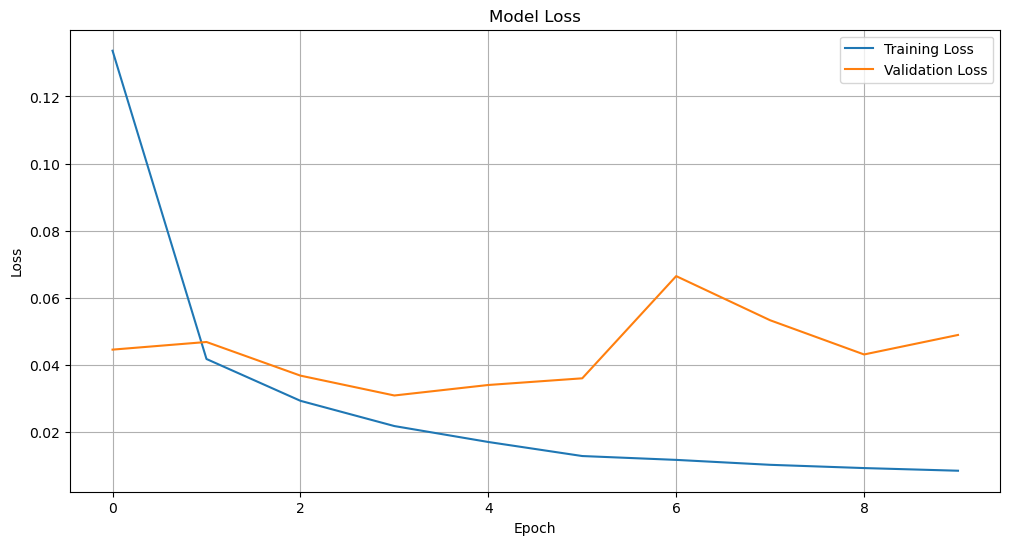

  Wavelet  Accuracy  Precision    Recall  F1 Score
0    dmey    0.9898   0.989961  0.989694  0.989783


In [12]:
import numpy as np
import pandas as pd
import pywt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Perform wavelet transform on the images
def apply_wavelet_transform(images, wavelet_func):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, wavelet_func)
        LL, (LH, HL, HH) = coeffs2
        transformed_images.append(LL)
    return np.array(transformed_images)

discrete_wavelets = [
    'dmey'
]

# Create lists to store results
wavelet_results = []
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

for wavelet_func in discrete_wavelets:
    print(f"Applying wavelet transform with '{wavelet_func}'...")
    x_train_transformed = apply_wavelet_transform(x_train, wavelet_func)
    x_test_transformed = apply_wavelet_transform(x_test, wavelet_func)

    # Normalize data
    x_train_transformed = x_train_transformed.astype('float32') / 255.0
    x_test_transformed = x_test_transformed.astype('float32') / 255.0

    # Step 2: Design CNN architecture
    model = Sequential([
        Input(shape=(x_train_transformed.shape[1], x_train_transformed.shape[2], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Step 3: Train the model
    history = model.fit(x_train_transformed, y_train, epochs=10, validation_split=0.2)

    # Step 4: Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_transformed, y_test, verbose=0)

    # Step 5: Calculate additional metrics
    y_pred_prob = model.predict(x_test_transformed)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results in lists
    wavelet_results.append(wavelet_func)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{wavelet_func} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{wavelet_func} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    

# Create DataFrame from the results
results_df = pd.DataFrame({
    'Wavelet': wavelet_results,
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1 Score': f1_results
})

# Print the results table
print(results_df)


## Wavelet Transform Using Daubechies Wavelets

Applying wavelet transform with 'db1'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8615 - loss: 0.4705 - val_accuracy: 0.9792 - val_loss: 0.0730
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9768 - loss: 0.0729 - val_accuracy: 0.9813 - val_loss: 0.0633
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9851 - val_loss: 0.0477
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9883 - loss: 0.0368 - val_accuracy: 0.9846 - val_loss: 0.0498
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9904 - loss: 0.0311 - val_accuracy: 0.9829 - val_loss: 0.0555
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0269 - val_accuracy: 0.9868 - val_loss: 0.0472
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9932 - loss: 0.0206 - val_accuracy: 0.9853 - val_loss: 0.0494
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/

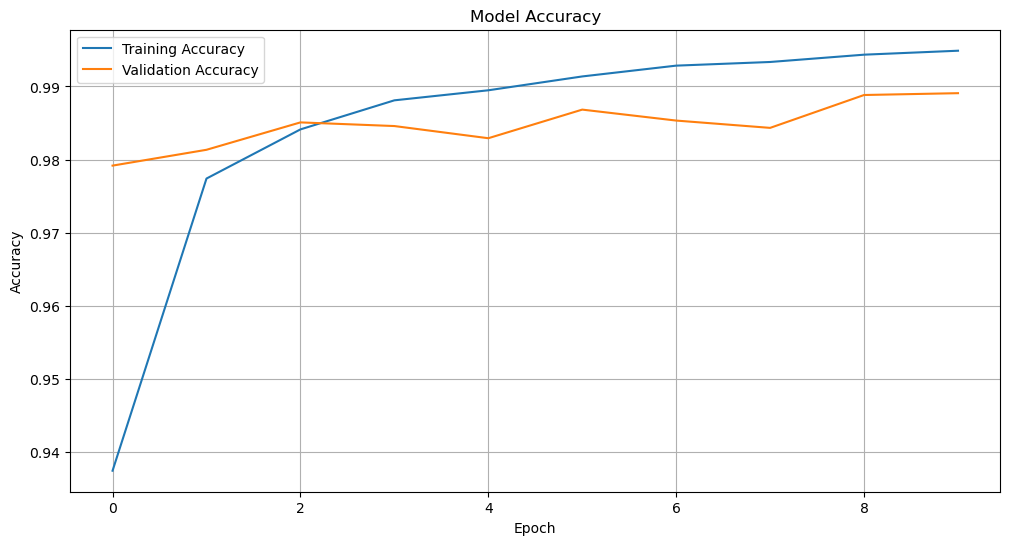

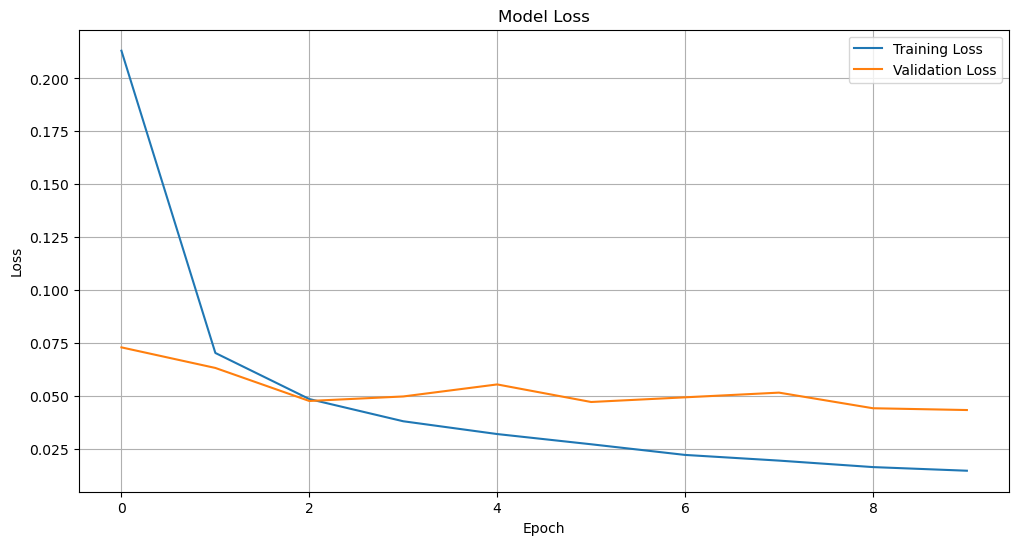

Applying wavelet transform with 'db2'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8559 - loss: 0.4769 - val_accuracy: 0.9728 - val_loss: 0.0903
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9786 - loss: 0.0695 - val_accuracy: 0.9793 - val_loss: 0.0658
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9847 - loss: 0.0487 - val_accuracy: 0.9831 - val_loss: 0.0570
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9879 - loss: 0.0378 - val_accuracy: 0.9823 - val_loss: 0.0594
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9868 - val_loss: 0.0412
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9927 - loss: 0.0238 - val_accuracy: 0.9861 - val_loss: 0.0470
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.9854 - val_loss: 0.0514
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/

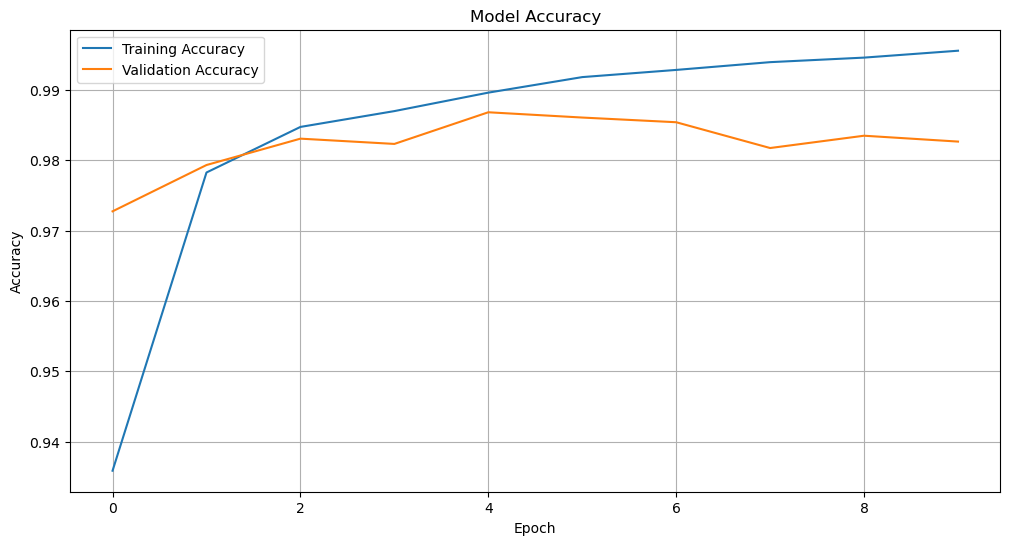

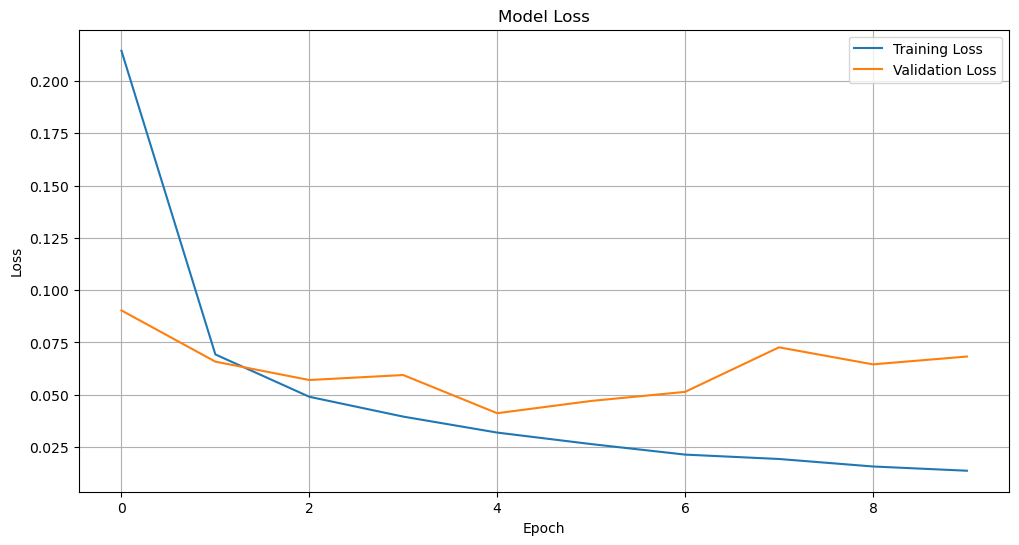

Applying wavelet transform with 'db3'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8575 - loss: 0.4939 - val_accuracy: 0.9585 - val_loss: 0.1227
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9764 - loss: 0.0768 - val_accuracy: 0.9799 - val_loss: 0.0650
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9849 - loss: 0.0490 - val_accuracy: 0.9820 - val_loss: 0.0650
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9814 - val_loss: 0.0615
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9859 - val_loss: 0.0483
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9923 - loss: 0.0236 - val_accuracy: 0.9858 - val_loss: 0.0539
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9934 - loss: 0.0199 - val_accuracy: 0.9842 - val_loss: 0.0565
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms

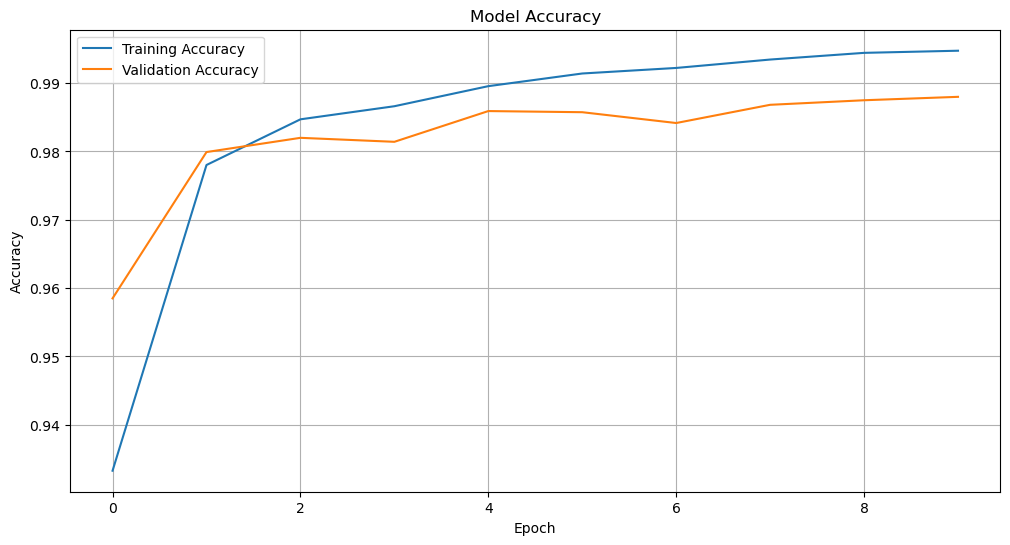

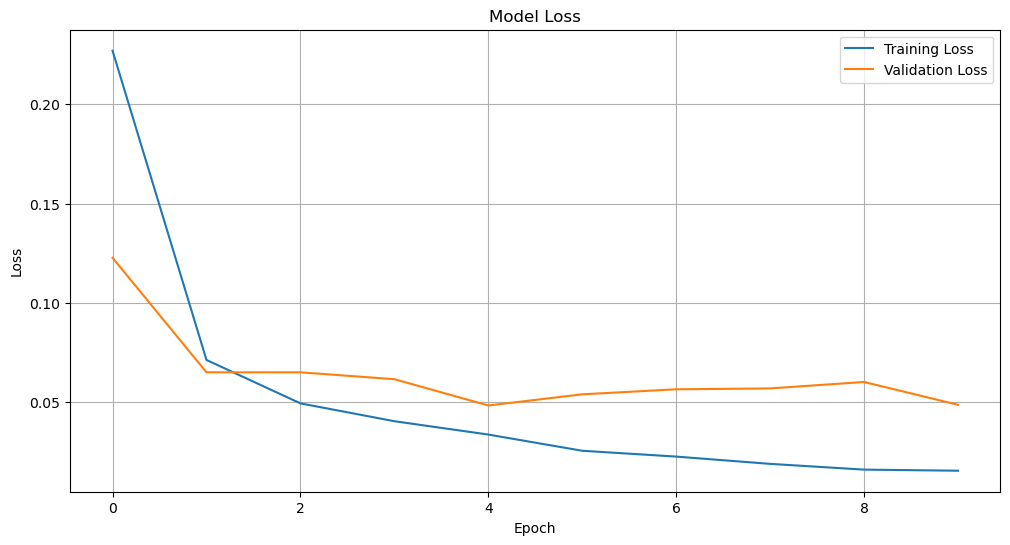

Applying wavelet transform with 'db4'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8374 - loss: 0.5218 - val_accuracy: 0.9674 - val_loss: 0.1079
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9707 - loss: 0.0946 - val_accuracy: 0.9760 - val_loss: 0.0825
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9808 - loss: 0.0623 - val_accuracy: 0.9743 - val_loss: 0.0829
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9841 - loss: 0.0483 - val_accuracy: 0.9808 - val_loss: 0.0638
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9879 - loss: 0.0383 - val_accuracy: 0.9828 - val_loss: 0.0576
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9895 - loss: 0.0332 - val_accuracy: 0.9844 - val_loss: 0.0547
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9912 - loss: 0.0276 - val_accuracy: 0.9813 - val_loss: 0.0668
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/

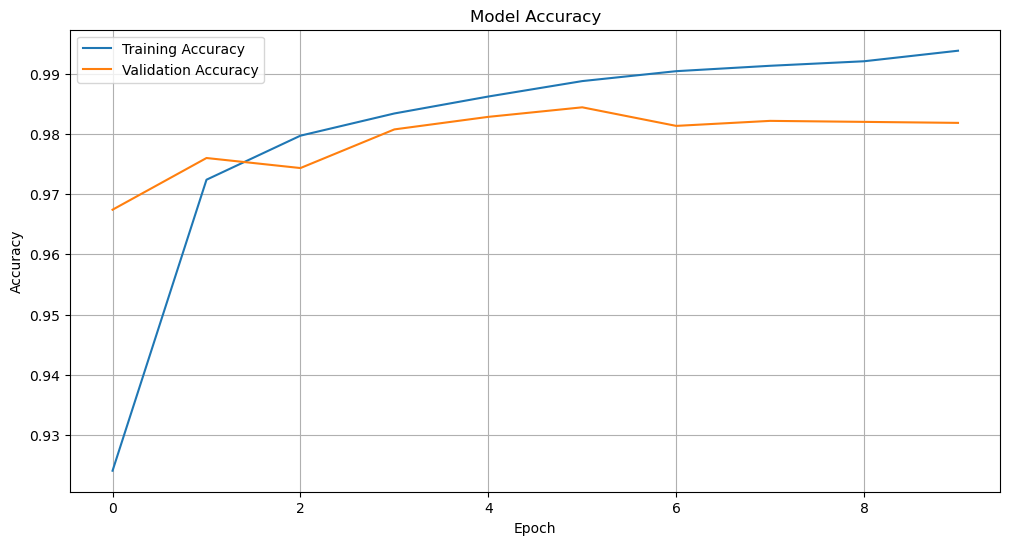

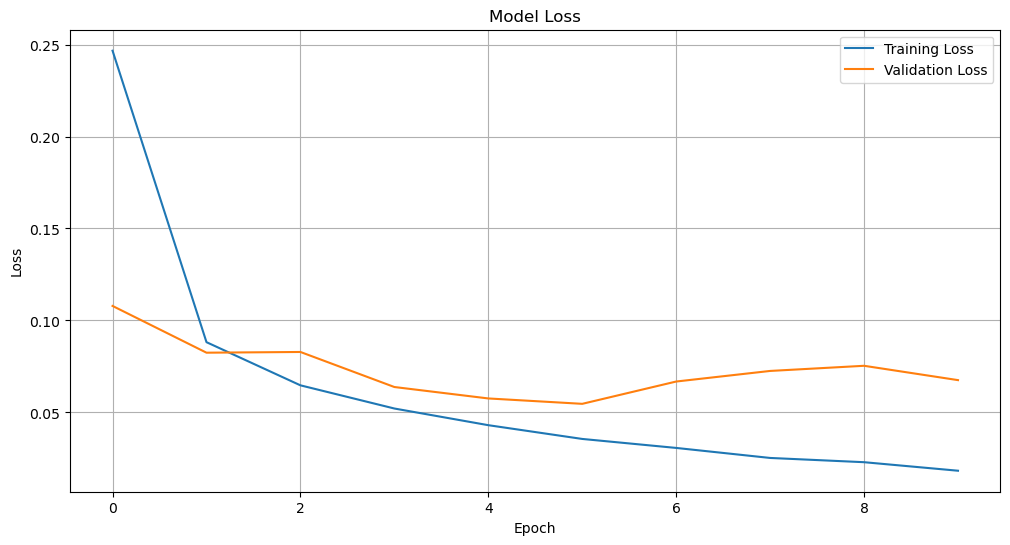

Applying wavelet transform with 'db5'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8661 - loss: 0.4451 - val_accuracy: 0.9760 - val_loss: 0.0801
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9802 - loss: 0.0624 - val_accuracy: 0.9858 - val_loss: 0.0464
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9865 - loss: 0.0444 - val_accuracy: 0.9854 - val_loss: 0.0509
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 0.9848 - val_loss: 0.0512
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9866 - val_loss: 0.0421
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9943 - loss: 0.0187 - val_accuracy: 0.9851 - val_loss: 0.0524
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9948 - loss: 0.0155 - val_accuracy: 0.9864 - val_loss: 0.0461
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/

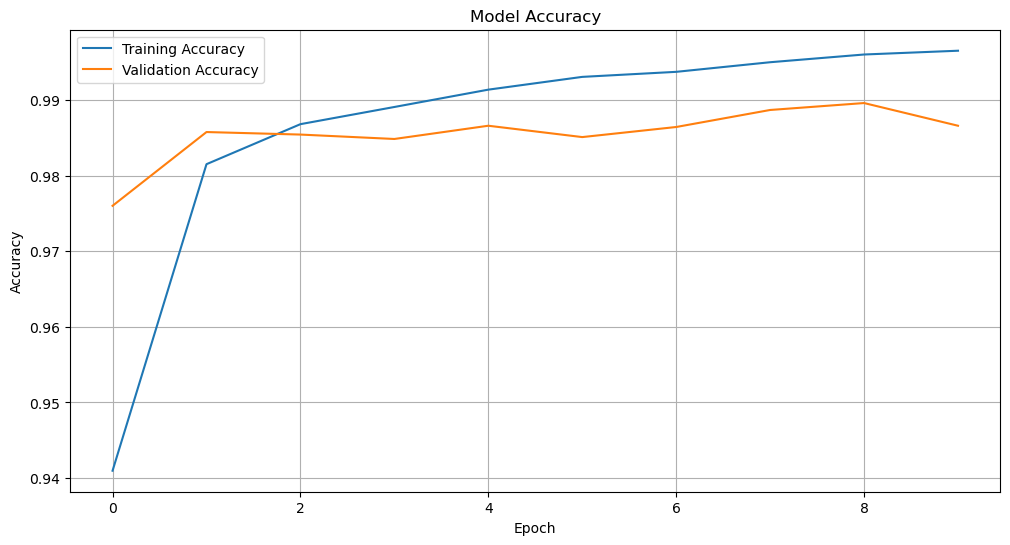

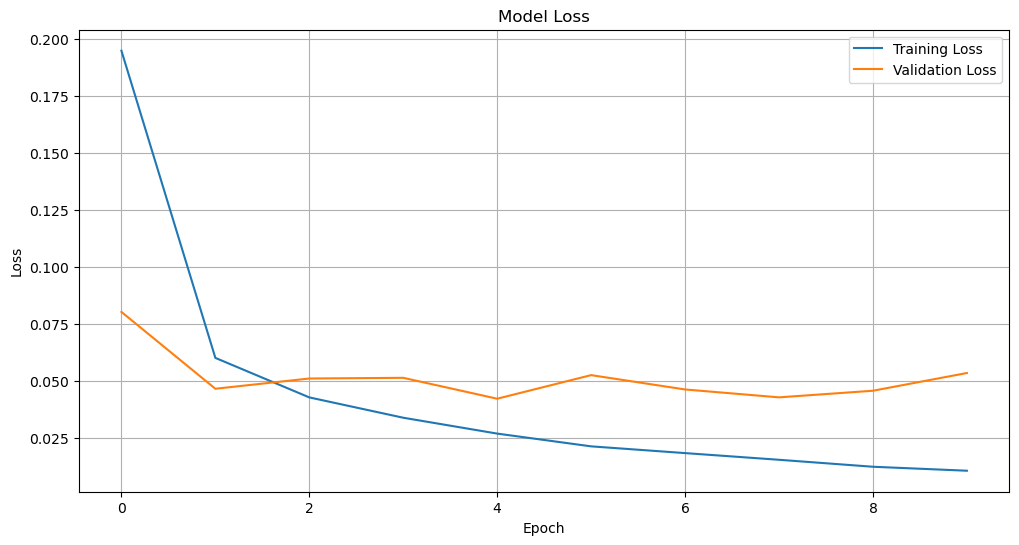

Applying wavelet transform with 'db6'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8609 - loss: 0.4528 - val_accuracy: 0.9761 - val_loss: 0.0774
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9791 - loss: 0.0689 - val_accuracy: 0.9801 - val_loss: 0.0667
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.9858 - val_loss: 0.0486
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9895 - loss: 0.0333 - val_accuracy: 0.9870 - val_loss: 0.0440
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9909 - loss: 0.0255 - val_accuracy: 0.9863 - val_loss: 0.0425
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accuracy: 0.9876 - val_loss: 0.0461
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9943 - loss: 0.0162 - val_accuracy: 0.9870 - val_loss: 0.0487
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms

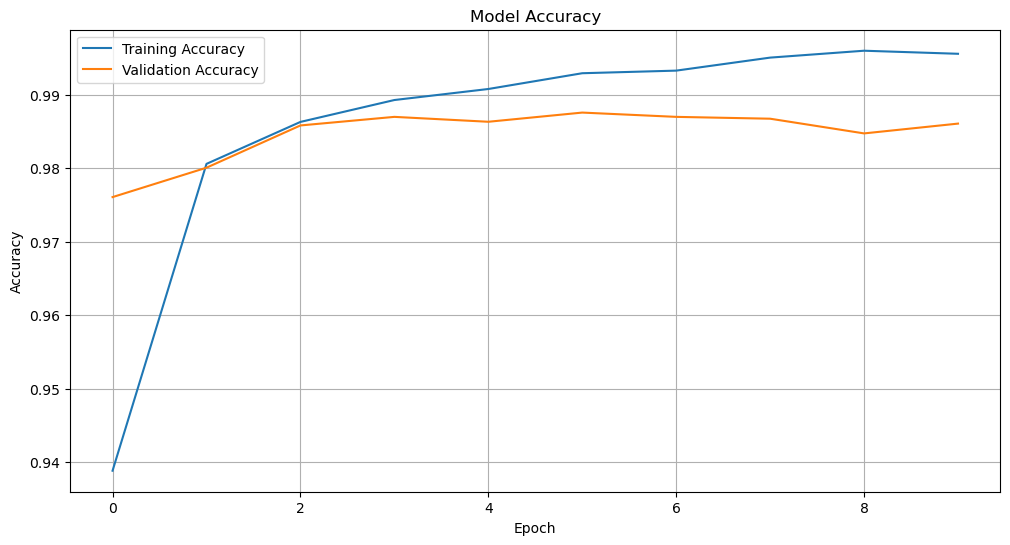

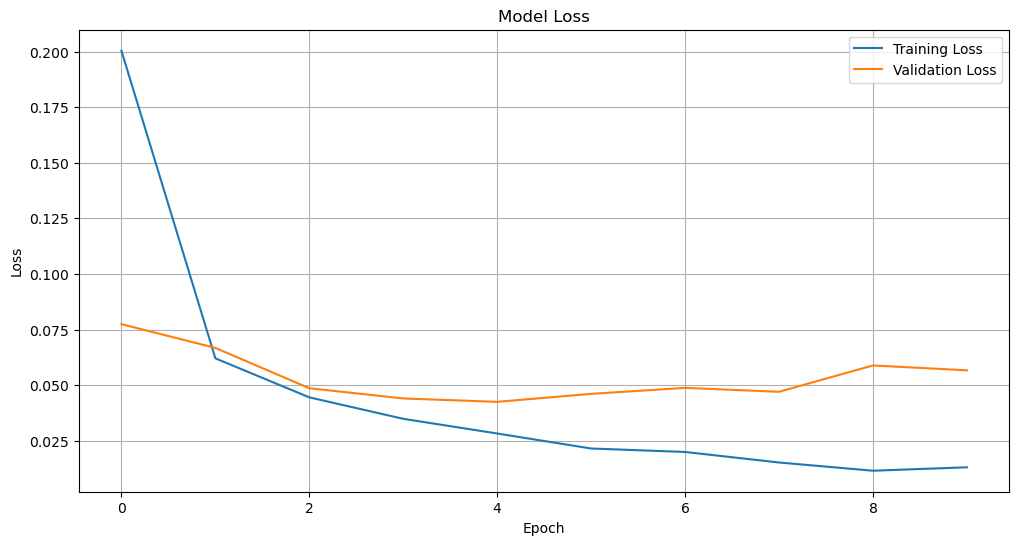

Applying wavelet transform with 'db7'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8560 - loss: 0.4674 - val_accuracy: 0.9712 - val_loss: 0.0950
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9746 - loss: 0.0784 - val_accuracy: 0.9774 - val_loss: 0.0765
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9834 - loss: 0.0540 - val_accuracy: 0.9795 - val_loss: 0.0725
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9873 - loss: 0.0389 - val_accuracy: 0.9822 - val_loss: 0.0612
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9909 - loss: 0.0312 - val_accuracy: 0.9854 - val_loss: 0.0522
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9865 - val_loss: 0.0504
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms

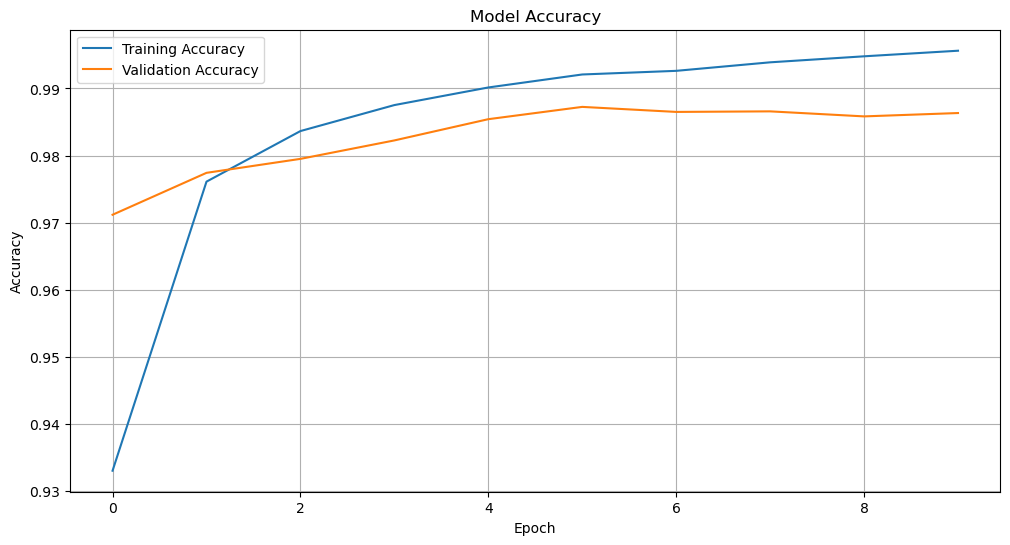

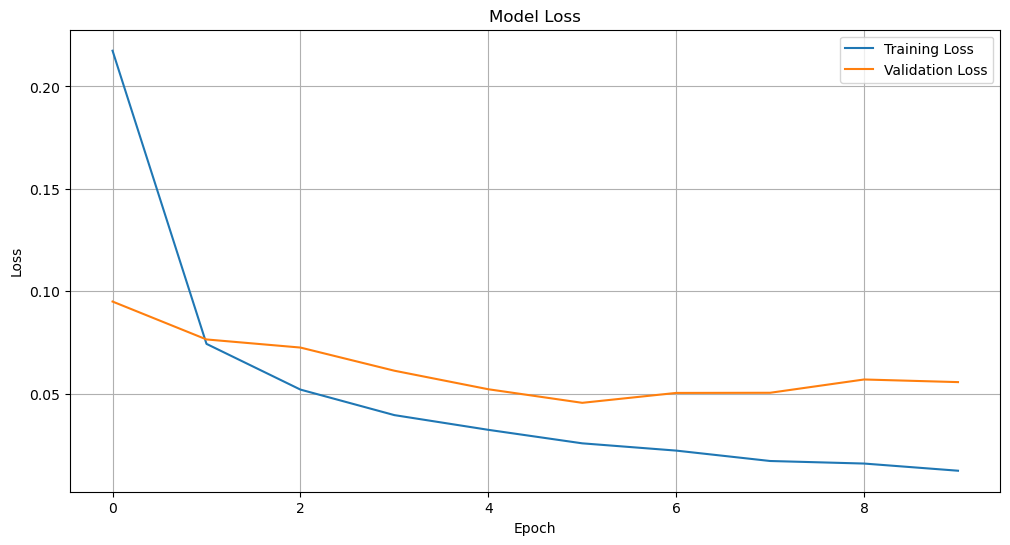

Applying wavelet transform with 'db8'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8425 - loss: 0.5037 - val_accuracy: 0.9672 - val_loss: 0.1074
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9767 - val_loss: 0.0812
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accuracy: 0.9748 - val_loss: 0.0791
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9843 - val_loss: 0.0520
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9907 - loss: 0.0308 - val_accuracy: 0.9833 - val_loss: 0.0596
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9924 - loss: 0.0252 - val_accuracy: 0.9854 - val_loss: 0.0537
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9791 - val_loss: 0.0752
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms

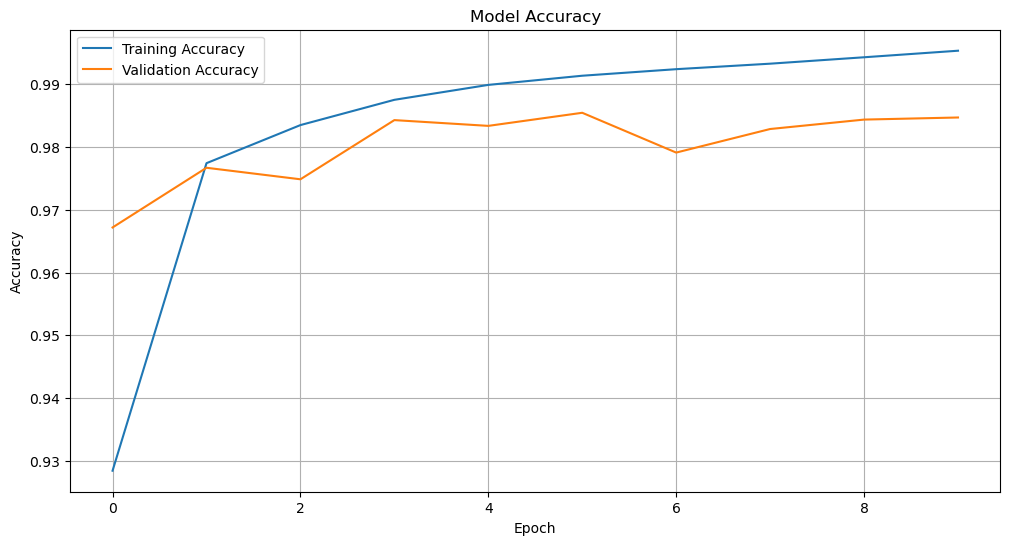

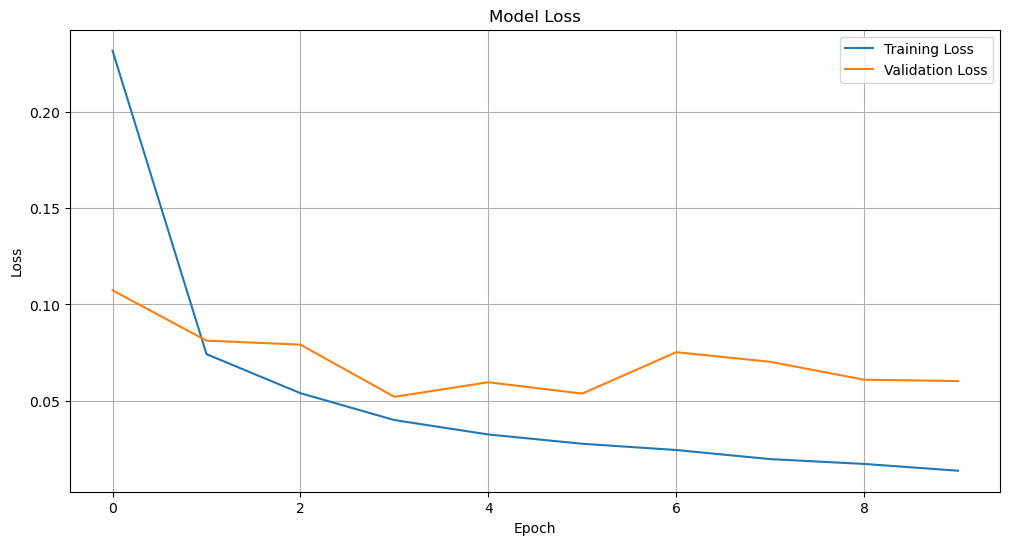

Applying wavelet transform with 'db9'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8727 - loss: 0.4016 - val_accuracy: 0.9792 - val_loss: 0.0705
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9804 - loss: 0.0615 - val_accuracy: 0.9822 - val_loss: 0.0610
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9892 - loss: 0.0309 - val_accuracy: 0.9865 - val_loss: 0.0456
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9883 - val_loss: 0.0435
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9879 - val_loss: 0.0432
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9876 - val_loss: 0.0483
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14

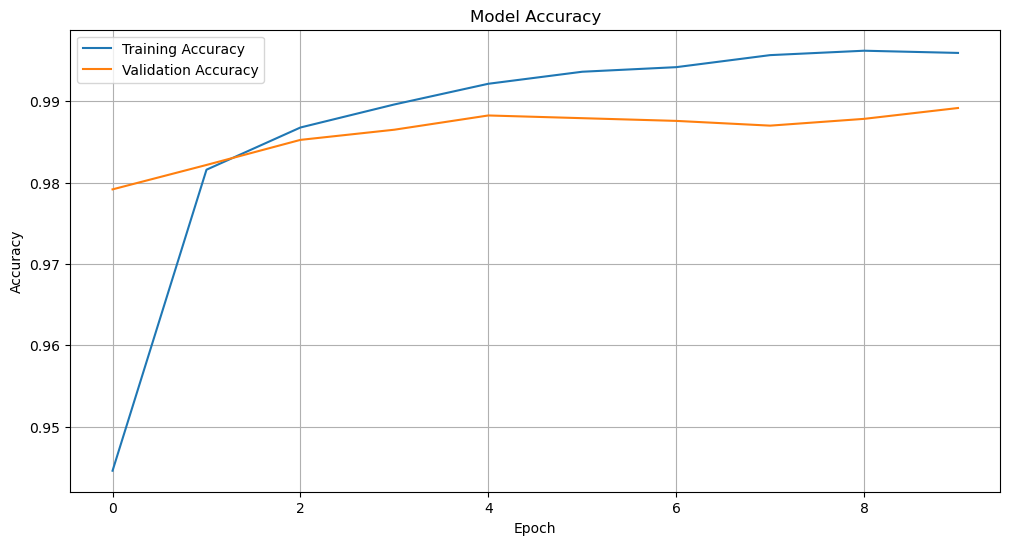

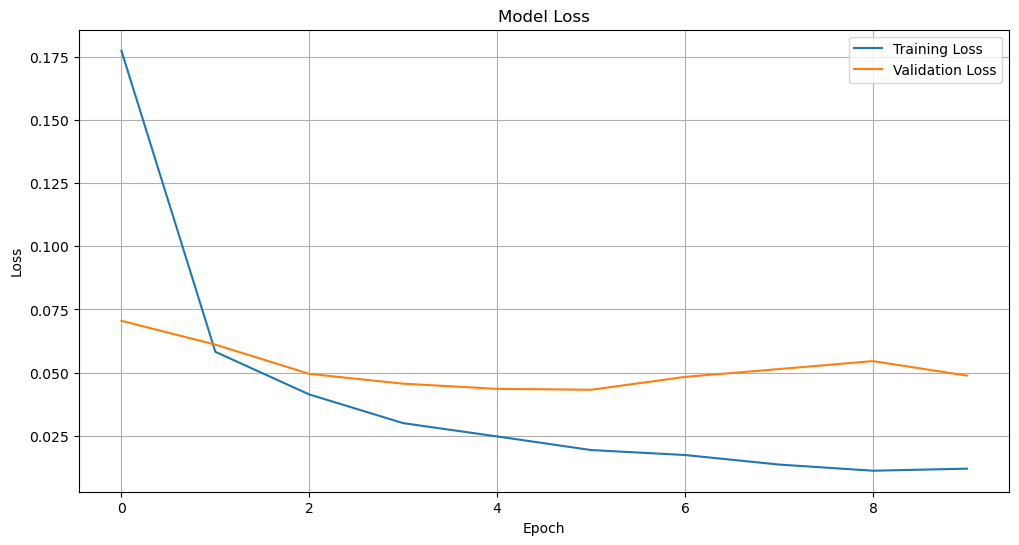

Applying wavelet transform with 'db10'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8809 - loss: 0.3928 - val_accuracy: 0.9797 - val_loss: 0.0699
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9809 - loss: 0.0599 - val_accuracy: 0.9824 - val_loss: 0.0573
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9865 - loss: 0.0422 - val_accuracy: 0.9874 - val_loss: 0.0466
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9849 - val_loss: 0.0527
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9885 - val_loss: 0.0432
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9871 - val_loss: 0.0486
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9880 - val_loss: 0.0458
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━

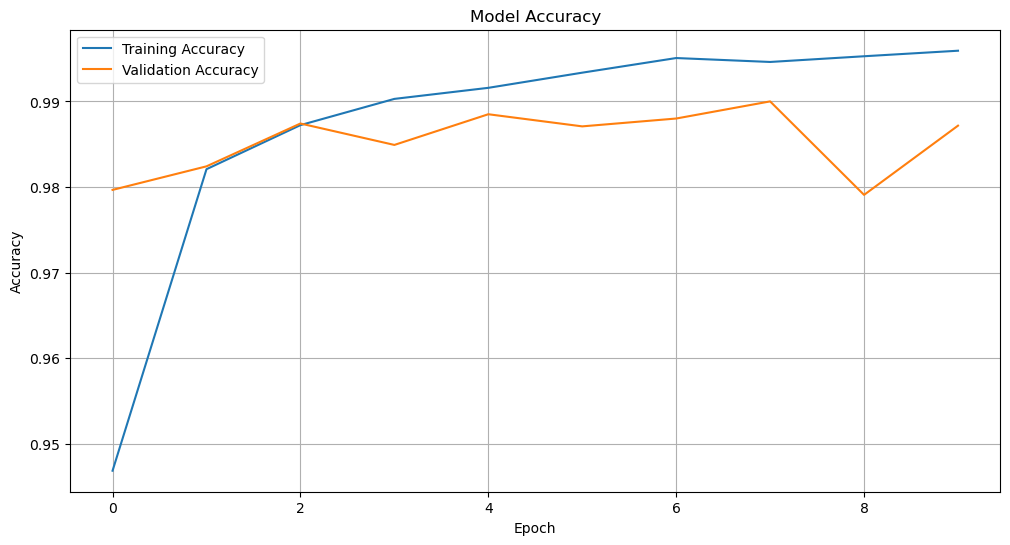

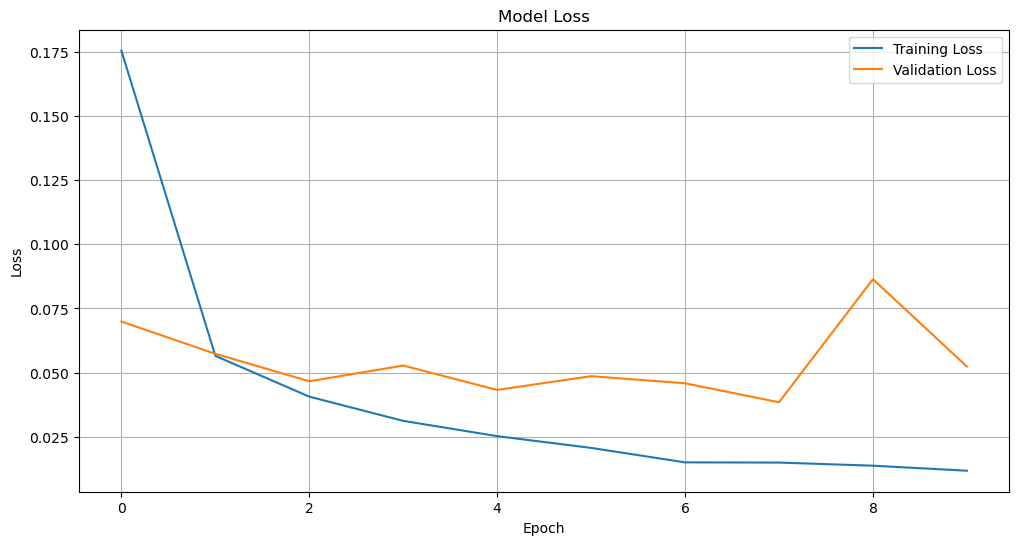

  Wavelet  Accuracy  Precision    Recall  F1 Score
0     db1    0.9897   0.989679  0.989583  0.989622
1     db2    0.9842   0.984604  0.983728  0.984027
2     db3    0.9901   0.990187  0.989959  0.990065
3     db4    0.9832   0.983252  0.982993  0.983059
4     db5    0.9867   0.986623  0.986702  0.986624
5     db6    0.9880   0.988144  0.987817  0.987945
6     db7    0.9877   0.987661  0.987629  0.987609
7     db8    0.9872   0.987108  0.987059  0.987049
8     db9    0.9900   0.990053  0.989731  0.989877
9    db10    0.9871   0.987066  0.987119  0.987047


In [13]:
import numpy as np
import pandas as pd
import pywt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Perform wavelet transform on the images
def apply_wavelet_transform(images, wavelet_func):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, wavelet_func)
        LL, (LH, HL, HH) = coeffs2
        transformed_images.append(LL)
    return np.array(transformed_images)

discrete_wavelets = [
    'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10',
]

# Create lists to store results
wavelet_results = []
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

for wavelet_func in discrete_wavelets:
    print(f"Applying wavelet transform with '{wavelet_func}'...")
    x_train_transformed = apply_wavelet_transform(x_train, wavelet_func)
    x_test_transformed = apply_wavelet_transform(x_test, wavelet_func)

    # Normalize data
    x_train_transformed = x_train_transformed.astype('float32') / 255.0
    x_test_transformed = x_test_transformed.astype('float32') / 255.0

    # Step 2: Design CNN architecture
    model = Sequential([
        Input(shape=(x_train_transformed.shape[1], x_train_transformed.shape[2], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Step 3: Train the model
    history = model.fit(x_train_transformed, y_train, epochs=10, validation_split=0.2)

    # Step 4: Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_transformed, y_test, verbose=0)

    # Step 5: Calculate additional metrics
    y_pred_prob = model.predict(x_test_transformed)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results in lists
    wavelet_results.append(wavelet_func)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{wavelet_func} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrame from the results
results_df = pd.DataFrame({
    'Wavelet': wavelet_results,
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1 Score': f1_results
})

# Print the results table
print(results_df)


## Wavelet Transform Using Symlets

Applying wavelet transform with 'sym2'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8690 - loss: 0.4616 - val_accuracy: 0.9657 - val_loss: 0.1029
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9765 - loss: 0.0772 - val_accuracy: 0.9787 - val_loss: 0.0685
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9820 - val_loss: 0.0569
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9867 - val_loss: 0.0473
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9866 - val_loss: 0.0465
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9873 - val_loss: 0.0451
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9853 - val_loss: 0.0542
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5m

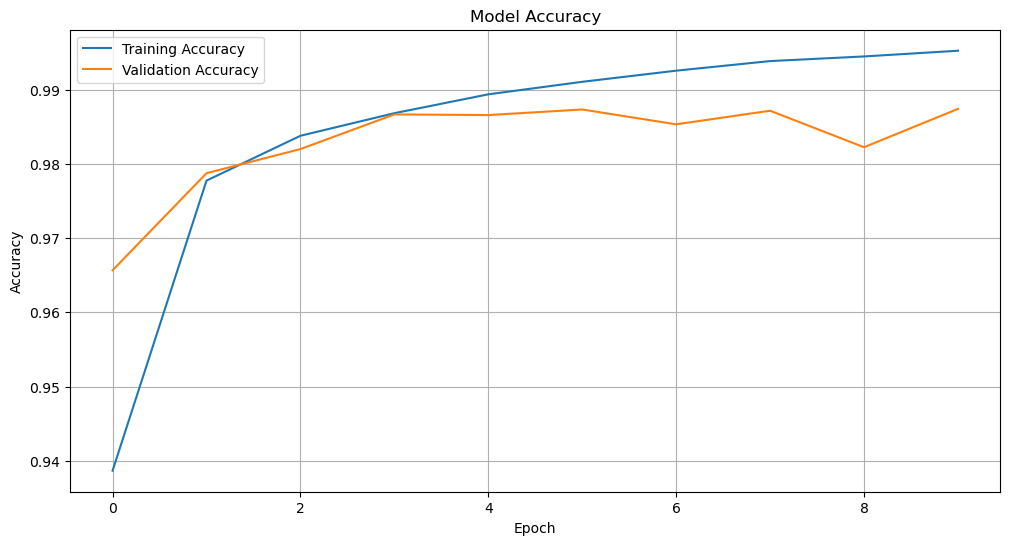

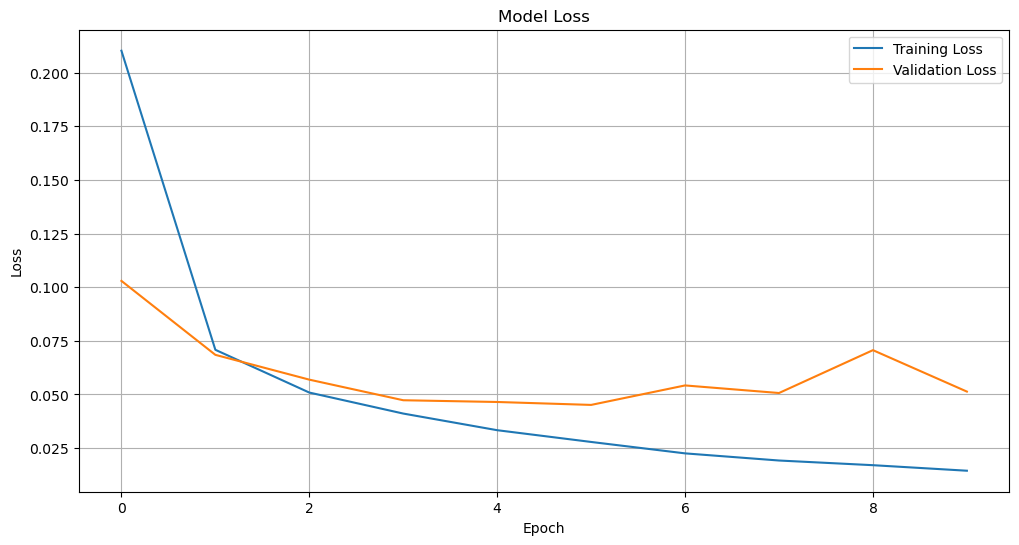

Applying wavelet transform with 'sym3'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8472 - loss: 0.5083 - val_accuracy: 0.9731 - val_loss: 0.0899
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9770 - loss: 0.0721 - val_accuracy: 0.9793 - val_loss: 0.0676
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9837 - loss: 0.0512 - val_accuracy: 0.9851 - val_loss: 0.0534
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9882 - loss: 0.0362 - val_accuracy: 0.9842 - val_loss: 0.0594
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0314 - val_accuracy: 0.9845 - val_loss: 0.0604
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9919 - loss: 0.0244 - val_accuracy: 0.9870 - val_loss: 0.0520
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0237 - val_accuracy: 0.9848 - val_loss: 0.0595
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms

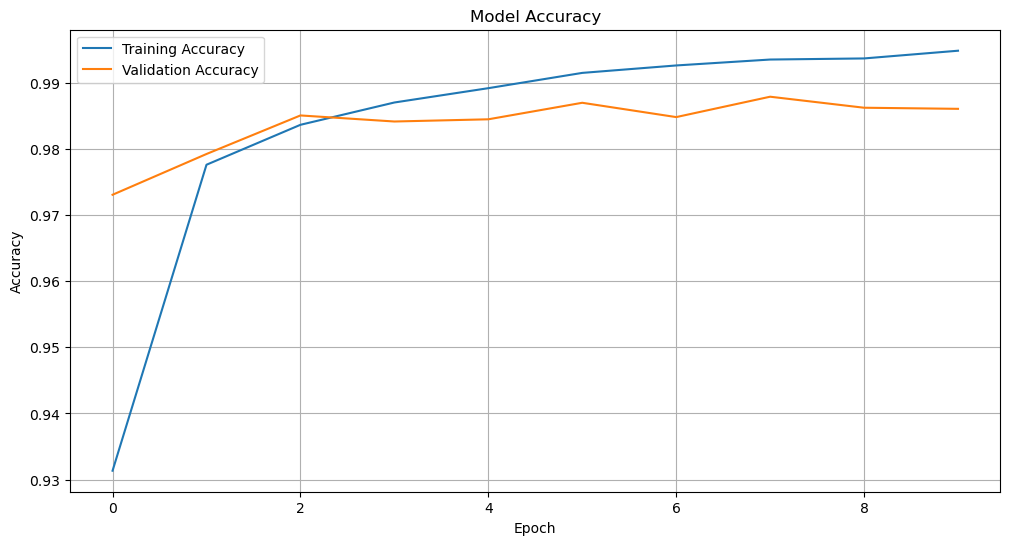

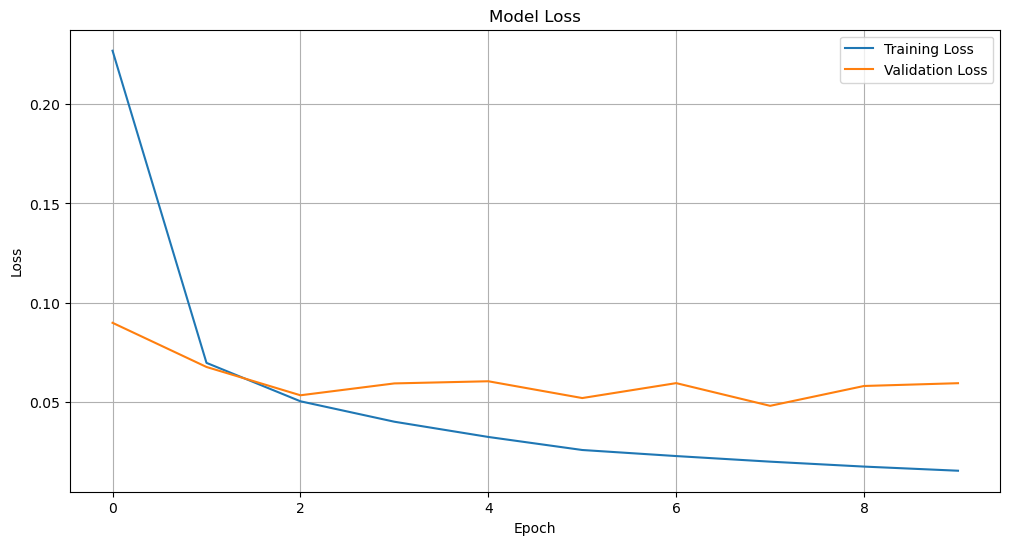

Applying wavelet transform with 'sym4'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8521 - loss: 0.4867 - val_accuracy: 0.9647 - val_loss: 0.1125
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9740 - loss: 0.0845 - val_accuracy: 0.9843 - val_loss: 0.0534
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9842 - loss: 0.0495 - val_accuracy: 0.9822 - val_loss: 0.0570
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0403 - val_accuracy: 0.9837 - val_loss: 0.0560
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9904 - loss: 0.0301 - val_accuracy: 0.9877 - val_loss: 0.0440
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9844 - val_loss: 0.0549
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0185 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms

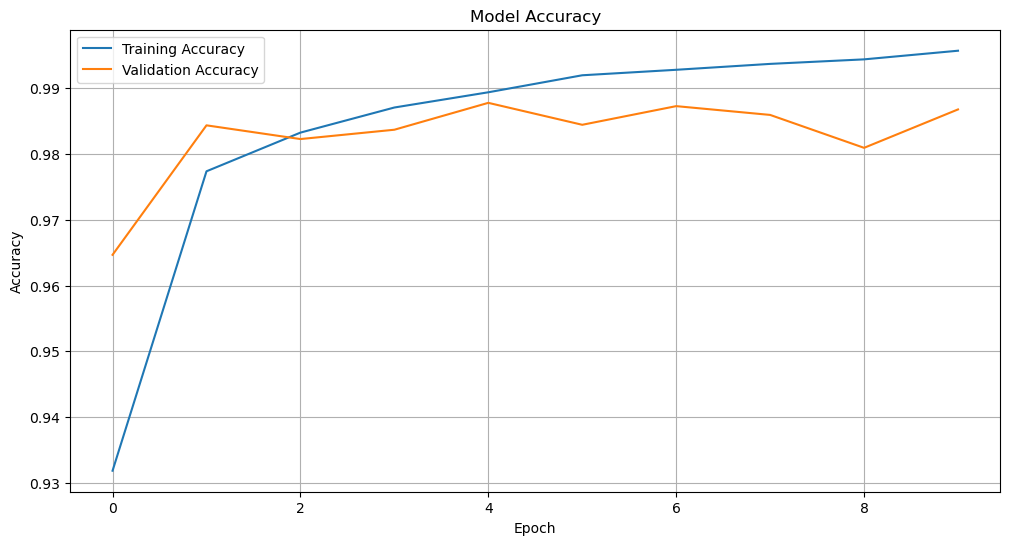

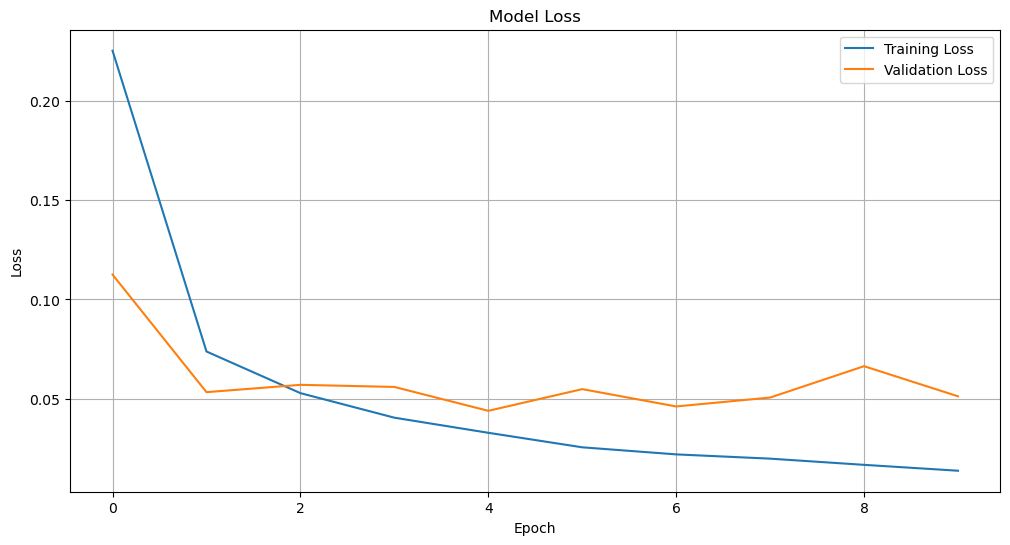

Applying wavelet transform with 'sym5'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8759 - loss: 0.4149 - val_accuracy: 0.9806 - val_loss: 0.0660
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9811 - loss: 0.0618 - val_accuracy: 0.9787 - val_loss: 0.0695
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0410 - val_accuracy: 0.9867 - val_loss: 0.0463
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9898 - loss: 0.0314 - val_accuracy: 0.9831 - val_loss: 0.0568
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9922 - loss: 0.0251 - val_accuracy: 0.9852 - val_loss: 0.0478
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.9865 - val_loss: 0.0476
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9877 - val_loss: 0.0477
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms

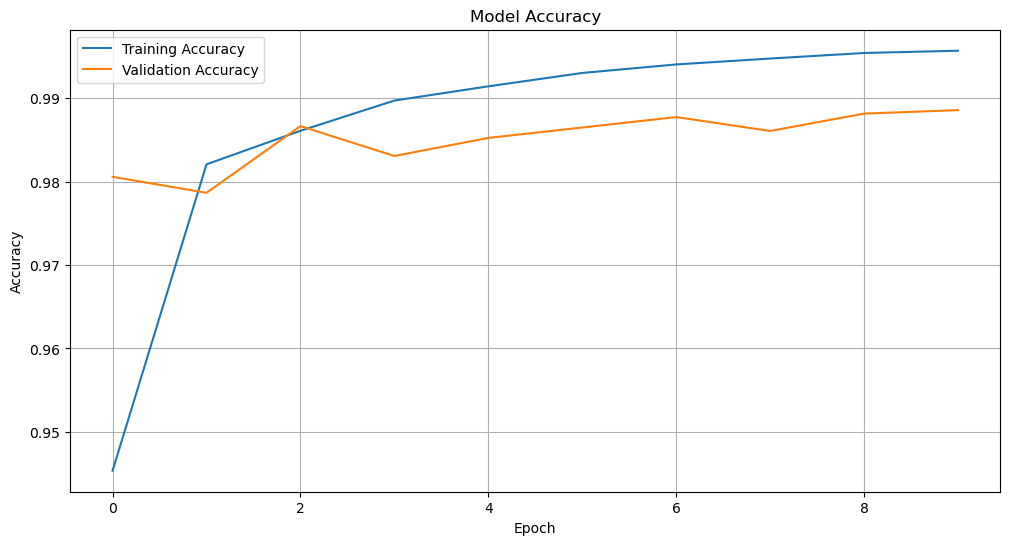

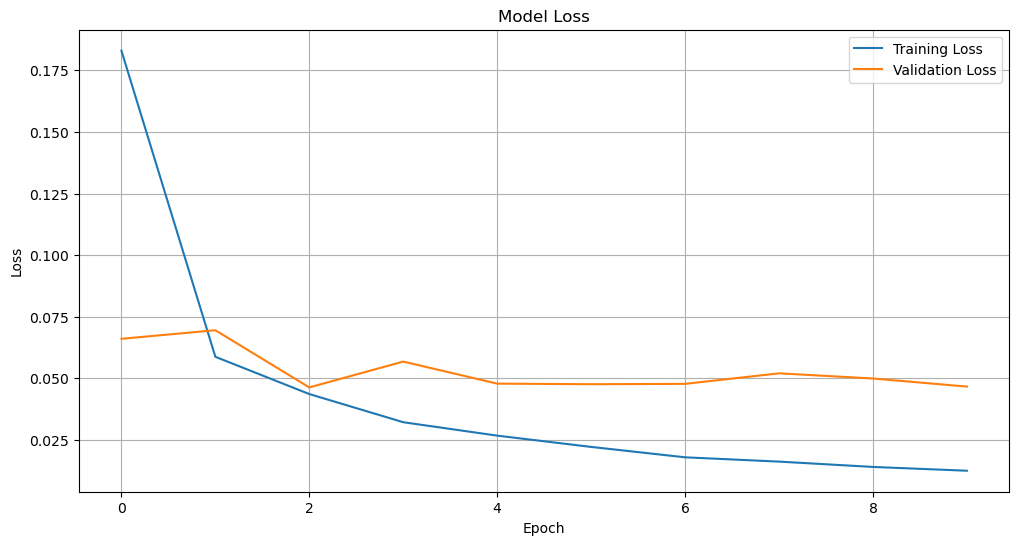

Applying wavelet transform with 'sym6'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8642 - loss: 0.4360 - val_accuracy: 0.9777 - val_loss: 0.0678
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9770 - loss: 0.0697 - val_accuracy: 0.9845 - val_loss: 0.0505
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9865 - loss: 0.0442 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9854 - val_loss: 0.0428
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9868 - val_loss: 0.0483
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9920 - loss: 0.0232 - val_accuracy: 0.9877 - val_loss: 0.0445
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9869 - val_loss: 0.0469
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5m

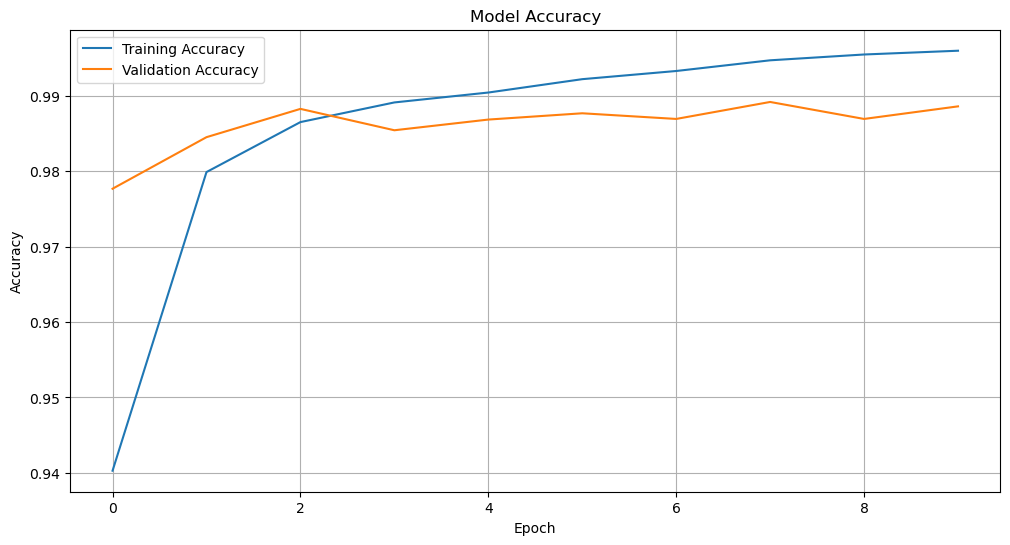

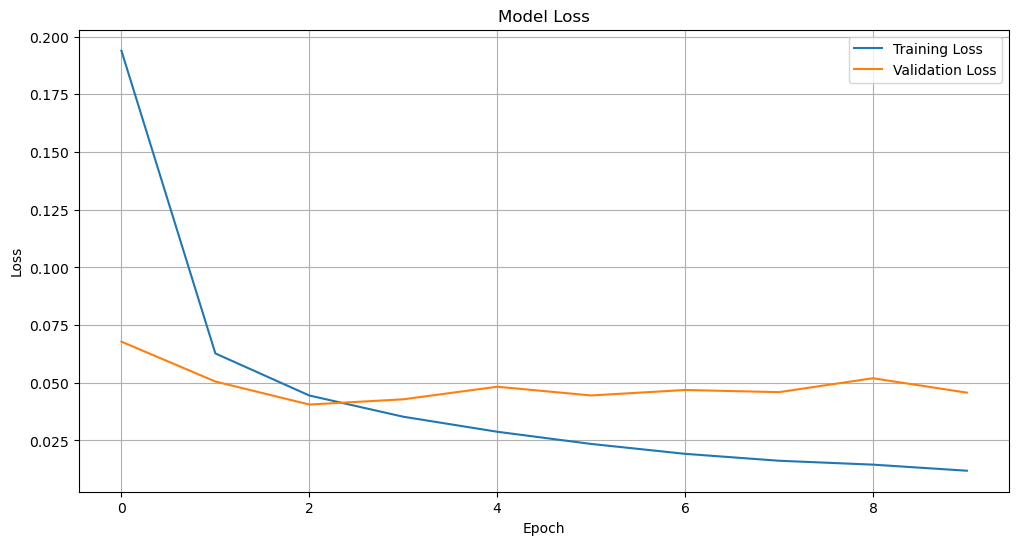

Applying wavelet transform with 'sym7'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8761 - loss: 0.4232 - val_accuracy: 0.9791 - val_loss: 0.0685
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9791 - loss: 0.0658 - val_accuracy: 0.9850 - val_loss: 0.0569
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9862 - loss: 0.0425 - val_accuracy: 0.9851 - val_loss: 0.0518
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9888 - loss: 0.0341 - val_accuracy: 0.9875 - val_loss: 0.0393
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9916 - loss: 0.0263 - val_accuracy: 0.9883 - val_loss: 0.0393
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9884 - val_loss: 0.0404
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6

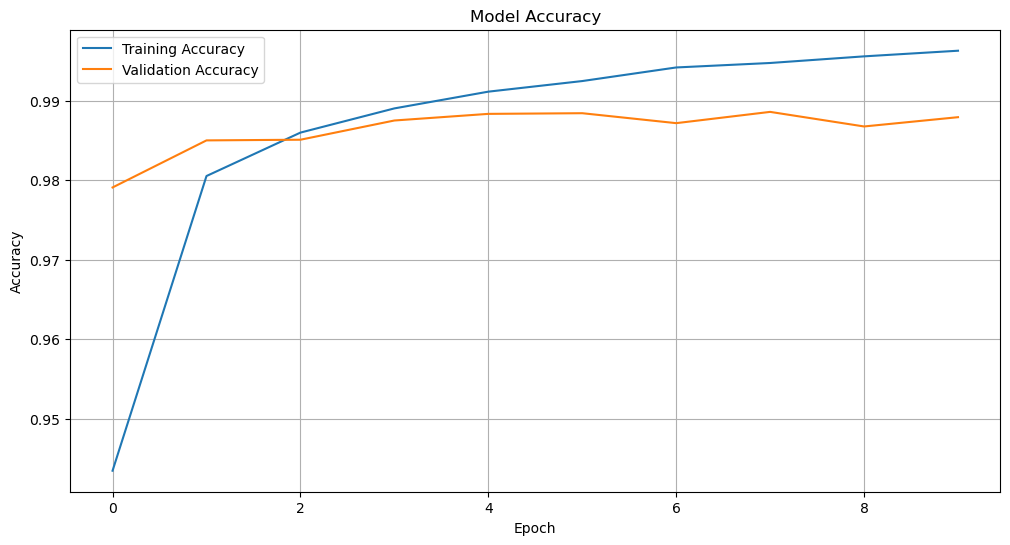

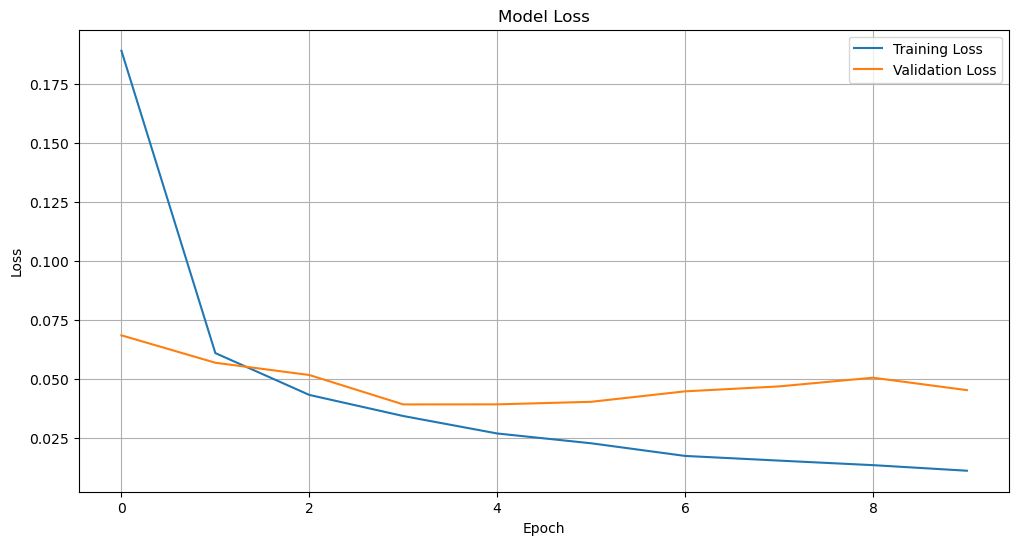

Applying wavelet transform with 'sym8'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8757 - loss: 0.4137 - val_accuracy: 0.9793 - val_loss: 0.0675
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9804 - loss: 0.0645 - val_accuracy: 0.9863 - val_loss: 0.0510
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9854 - loss: 0.0446 - val_accuracy: 0.9808 - val_loss: 0.0631
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9872 - val_loss: 0.0452
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9859 - val_loss: 0.0526
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9891 - val_loss: 0.0403
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9948 - loss: 0.0153 - val_accuracy: 0.9882 - val_loss: 0.0423
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11

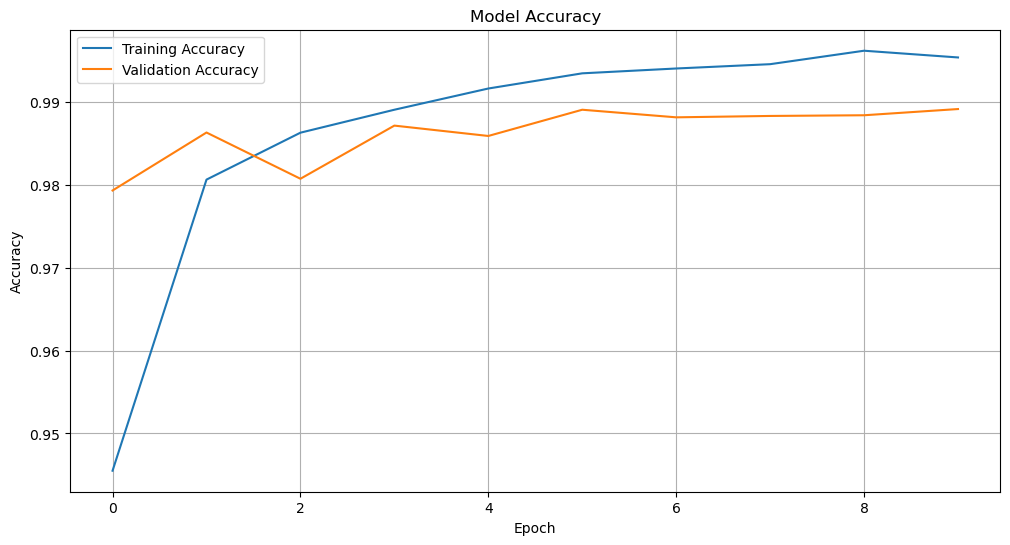

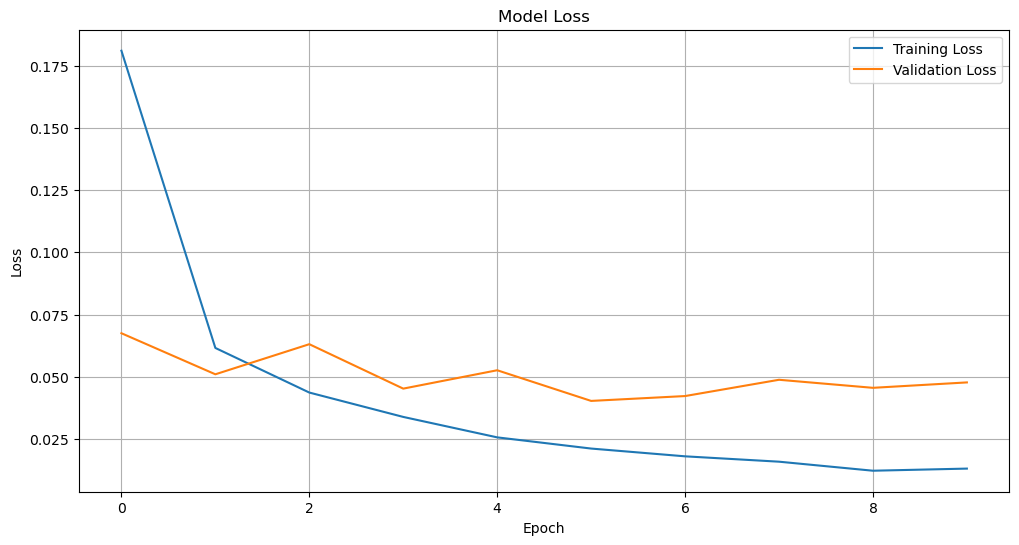

Applying wavelet transform with 'sym9'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8821 - loss: 0.3890 - val_accuracy: 0.9781 - val_loss: 0.0688
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9825 - loss: 0.0560 - val_accuracy: 0.9819 - val_loss: 0.0574
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9878 - loss: 0.0382 - val_accuracy: 0.9853 - val_loss: 0.0496
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9858 - val_loss: 0.0472
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9914 - loss: 0.0247 - val_accuracy: 0.9893 - val_loss: 0.0398
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9884 - val_loss: 0.0422
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9870 - val_loss: 0.0479
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━

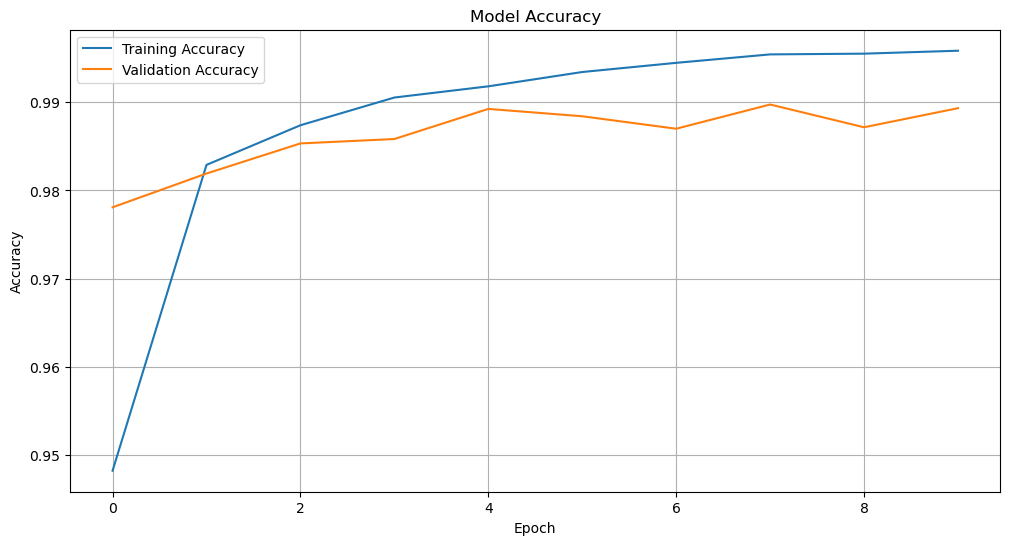

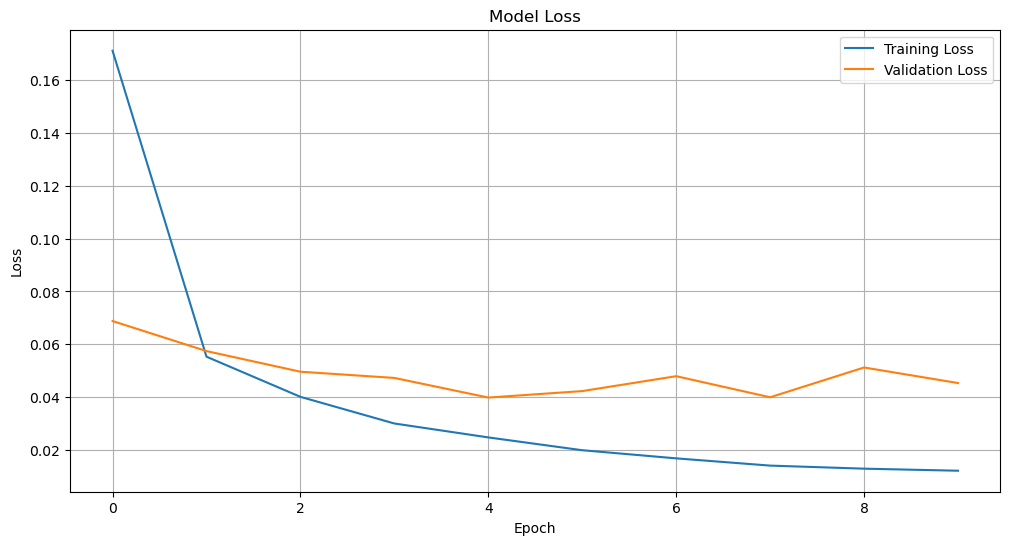

Applying wavelet transform with 'sym10'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8805 - loss: 0.3908 - val_accuracy: 0.9737 - val_loss: 0.0852
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9819 - loss: 0.0581 - val_accuracy: 0.9868 - val_loss: 0.0444
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9863 - val_loss: 0.0425
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9852 - val_loss: 0.0482
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9859 - val_loss: 0.0512
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.9891 - val_loss: 0.0424
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9908 - val_loss: 0.0366
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━

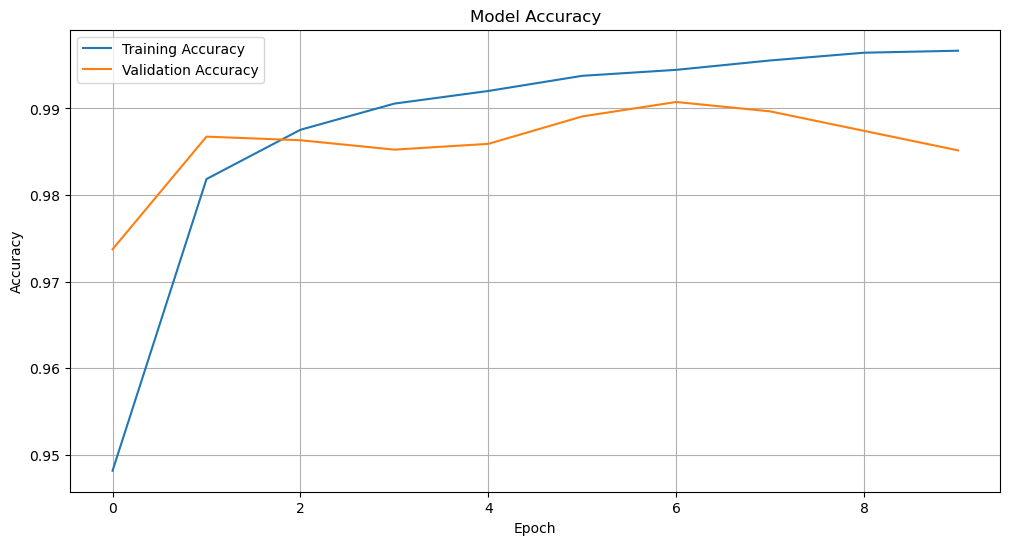

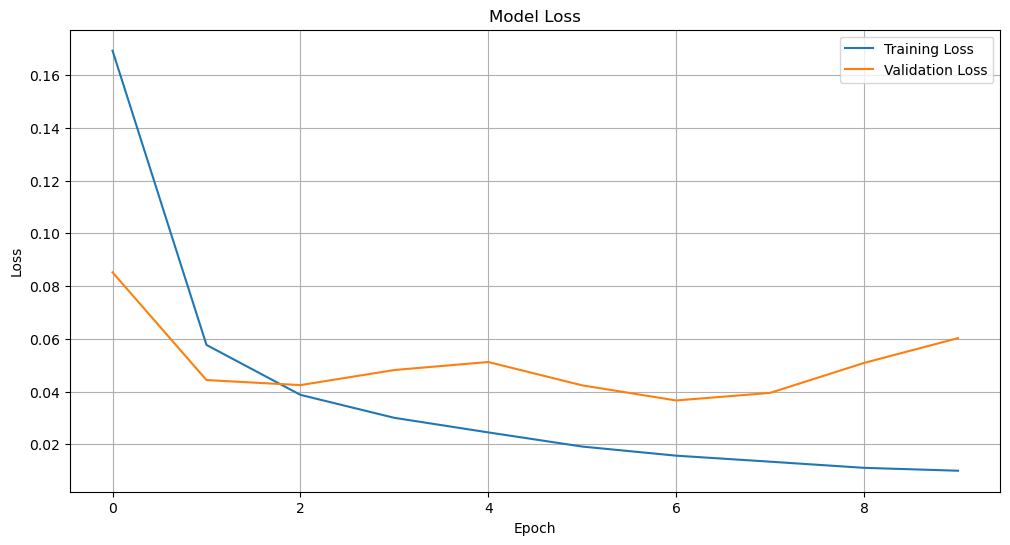

  Wavelet  Accuracy  Precision    Recall  F1 Score
0    sym2    0.9881   0.988256  0.987939  0.988063
1    sym3    0.9863   0.986316  0.986180  0.986192
2    sym4    0.9868   0.986609  0.986692  0.986610
3    sym5    0.9900   0.990012  0.989928  0.989949
4    sym6    0.9892   0.989088  0.989238  0.989111
5    sym7    0.9893   0.989134  0.989226  0.989114
6    sym8    0.9892   0.989032  0.989251  0.989107
7    sym9    0.9904   0.990333  0.990359  0.990318
8   sym10    0.9836   0.983453  0.983427  0.983336


In [14]:
import numpy as np
import pandas as pd
import pywt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Perform wavelet transform on the images
def apply_wavelet_transform(images, wavelet_func):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, wavelet_func)
        LL, (LH, HL, HH) = coeffs2
        transformed_images.append(LL)
    return np.array(transformed_images)

discrete_wavelets = [
    'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10',
]

# Create lists to store results
wavelet_results = []
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

for wavelet_func in discrete_wavelets:
    print(f"Applying wavelet transform with '{wavelet_func}'...")
    x_train_transformed = apply_wavelet_transform(x_train, wavelet_func)
    x_test_transformed = apply_wavelet_transform(x_test, wavelet_func)

    # Normalize data
    x_train_transformed = x_train_transformed.astype('float32') / 255.0
    x_test_transformed = x_test_transformed.astype('float32') / 255.0

    # Step 2: Design CNN architecture
    model = Sequential([
        Input(shape=(x_train_transformed.shape[1], x_train_transformed.shape[2], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Step 3: Train the model
    history = model.fit(x_train_transformed, y_train, epochs=10, validation_split=0.2)

    # Step 4: Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_transformed, y_test, verbose=0)

    # Step 5: Calculate additional metrics
    y_pred_prob = model.predict(x_test_transformed)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results in lists
    wavelet_results.append(wavelet_func)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{wavelet_func} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{wavelet_func} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrame from the results
results_df = pd.DataFrame({
    'Wavelet': wavelet_results,
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1 Score': f1_results
})

# Print the results table
print(results_df)


## Wavelet Transform Using Coiflets

Applying wavelet transform with 'coif1'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8526 - loss: 0.4933 - val_accuracy: 0.9753 - val_loss: 0.0777
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9767 - loss: 0.0767 - val_accuracy: 0.9790 - val_loss: 0.0706
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9831 - loss: 0.0533 - val_accuracy: 0.9840 - val_loss: 0.0530
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9879 - loss: 0.0393 - val_accuracy: 0.9864 - val_loss: 0.0442
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0317 - val_accuracy: 0.9877 - val_loss: 0.0380
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9920 - loss: 0.0260 - val_accuracy: 0.9814 - val_loss: 0.0638
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9862 - val_loss: 0.0483
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4

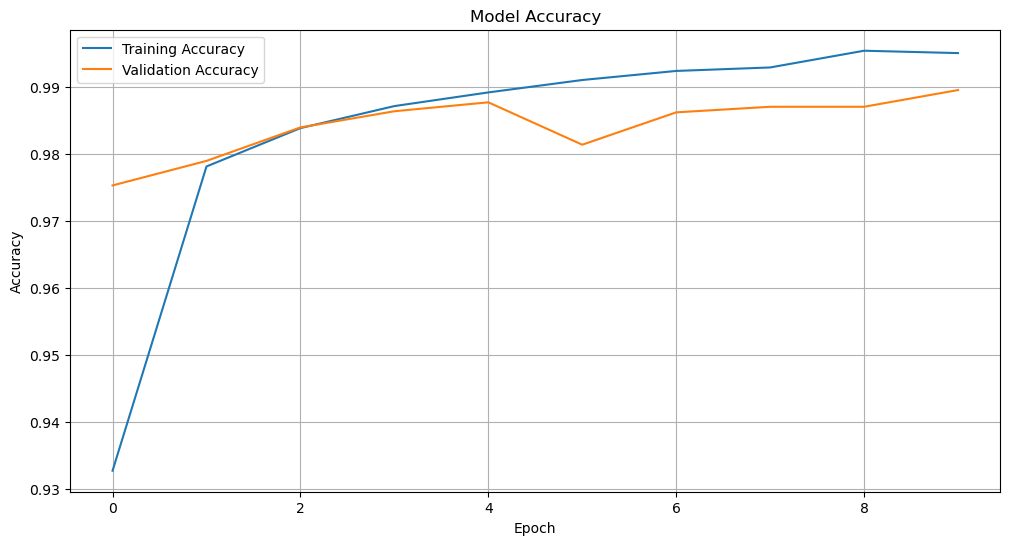

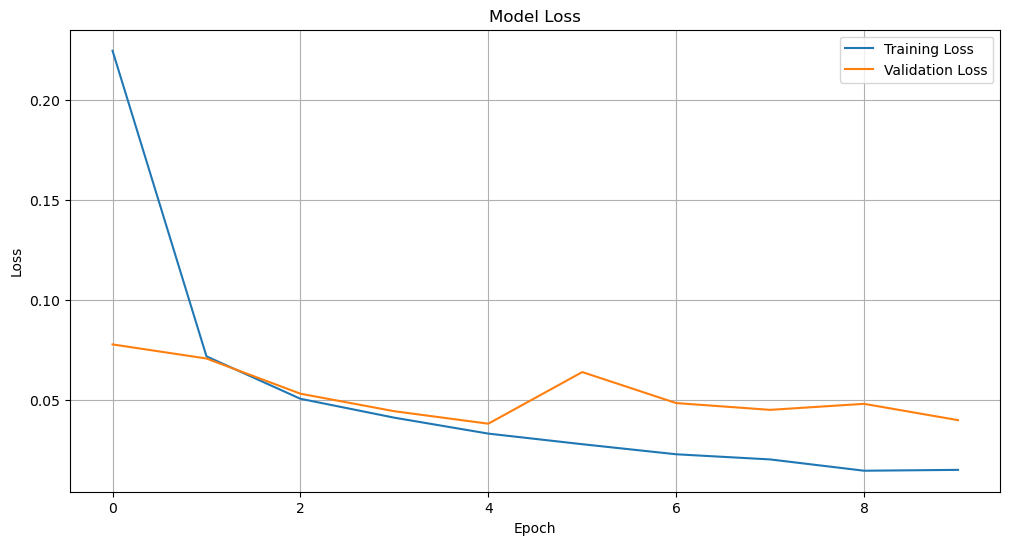

Applying wavelet transform with 'coif2'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8684 - loss: 0.4355 - val_accuracy: 0.9801 - val_loss: 0.0704
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9801 - loss: 0.0645 - val_accuracy: 0.9803 - val_loss: 0.0648
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9870 - loss: 0.0423 - val_accuracy: 0.9860 - val_loss: 0.0473
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9894 - loss: 0.0330 - val_accuracy: 0.9840 - val_loss: 0.0500
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9879 - val_loss: 0.0441
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9864 - val_loss: 0.0493
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9862 - val_loss: 0.0532
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6

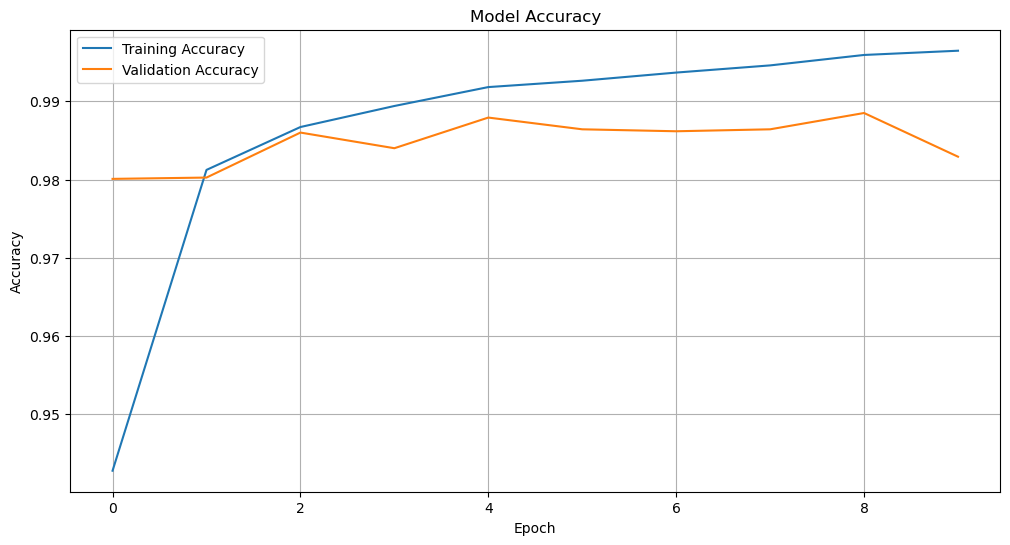

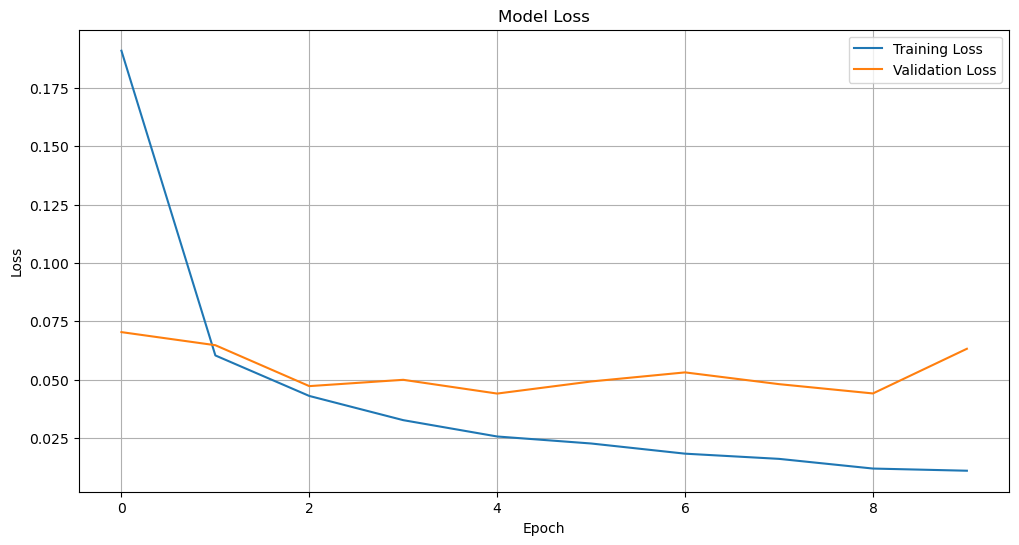

Applying wavelet transform with 'coif3'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8798 - loss: 0.3812 - val_accuracy: 0.9825 - val_loss: 0.0597
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9805 - loss: 0.0603 - val_accuracy: 0.9797 - val_loss: 0.0670
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9867 - loss: 0.0421 - val_accuracy: 0.9849 - val_loss: 0.0485
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9908 - loss: 0.0280 - val_accuracy: 0.9882 - val_loss: 0.0386
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9928 - loss: 0.0221 - val_accuracy: 0.9870 - val_loss: 0.0465
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9932 - loss: 0.0195 - val_accuracy: 0.9882 - val_loss: 0.0426
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9897 - val_loss: 0.0449
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━

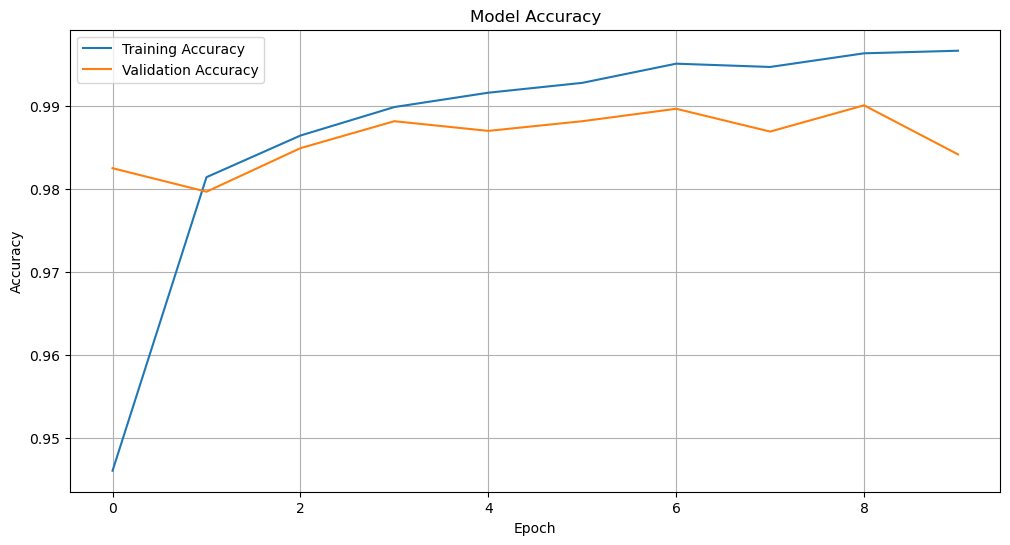

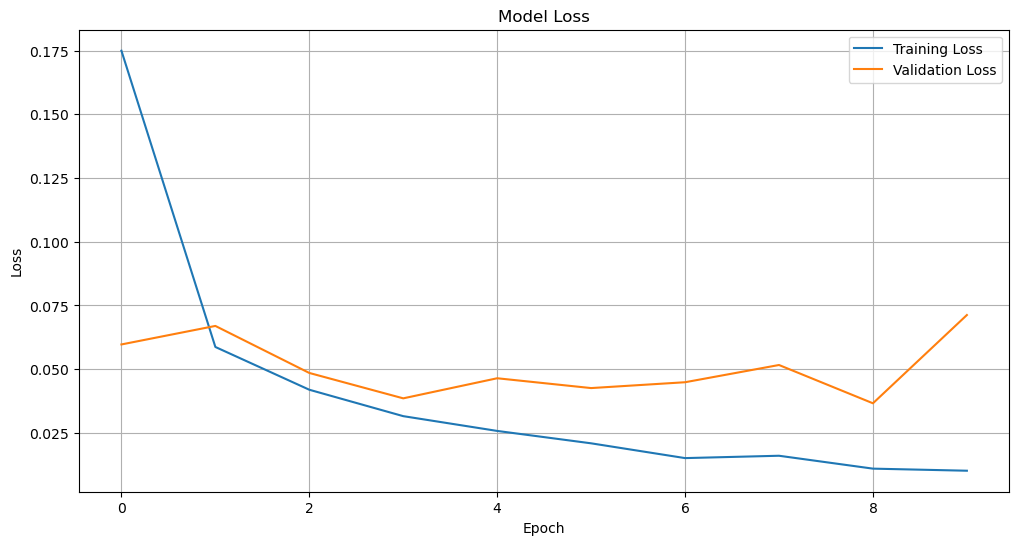

Applying wavelet transform with 'coif4'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8816 - loss: 0.3961 - val_accuracy: 0.9831 - val_loss: 0.0622
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9815 - loss: 0.0570 - val_accuracy: 0.9820 - val_loss: 0.0632
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9859 - val_loss: 0.0451
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9865 - val_loss: 0.0466
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9943 - loss: 0.0190 - val_accuracy: 0.9831 - val_loss: 0.0524
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9873 - val_loss: 0.0426
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9949 - loss: 0.0141 - val_accuracy: 0.9863 - val_loss: 0.0507
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━

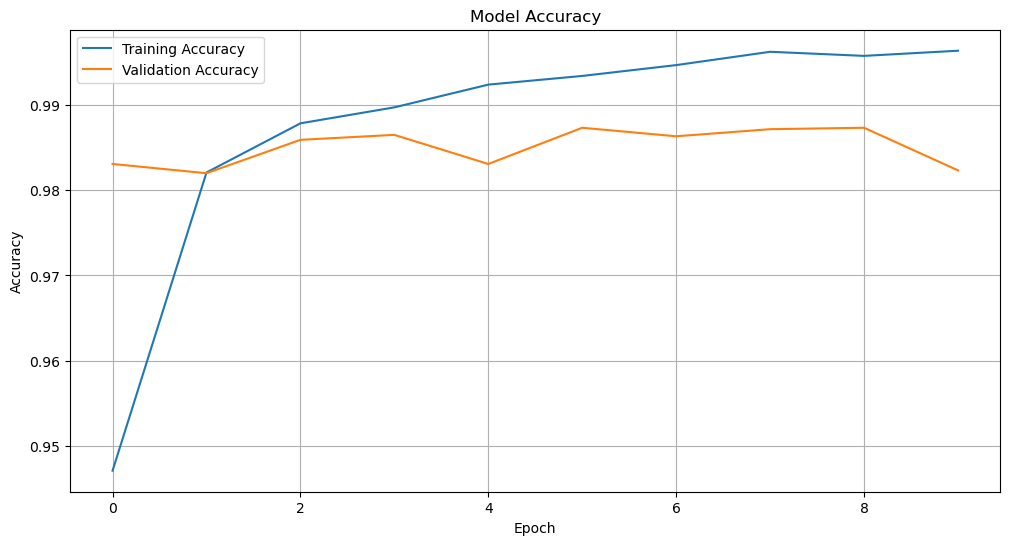

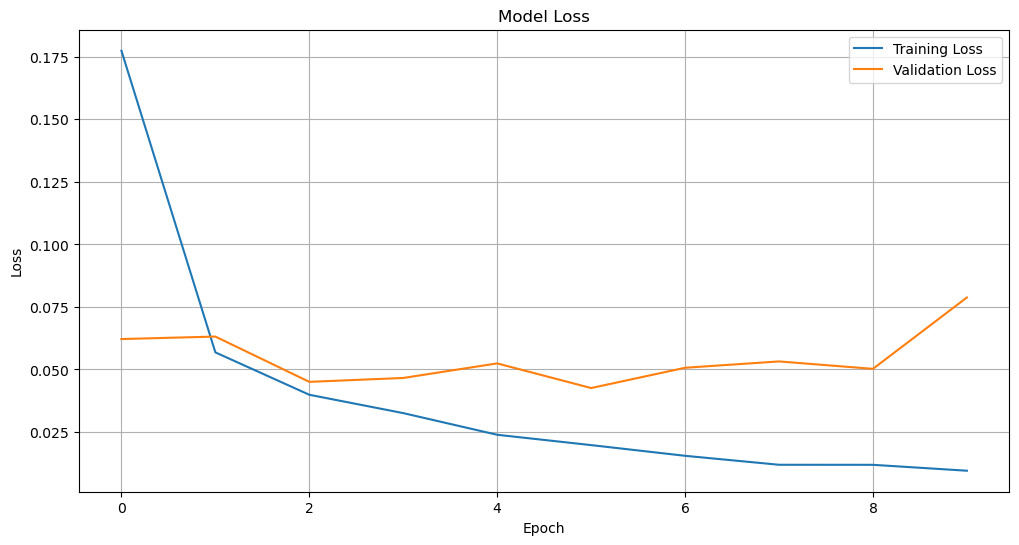

Applying wavelet transform with 'coif5'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8821 - loss: 0.3836 - val_accuracy: 0.9750 - val_loss: 0.0798
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9820 - loss: 0.0579 - val_accuracy: 0.9847 - val_loss: 0.0484
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9890 - loss: 0.0368 - val_accuracy: 0.9852 - val_loss: 0.0484
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9920 - loss: 0.0269 - val_accuracy: 0.9869 - val_loss: 0.0450
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9938 - loss: 0.0203 - val_accuracy: 0.9872 - val_loss: 0.0541
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9953 - loss: 0.0167 - val_accuracy: 0.9892 - val_loss: 0.0390
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9949 - loss: 0.0141 - val_accuracy: 0.9890 - val_loss: 0.0390
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━

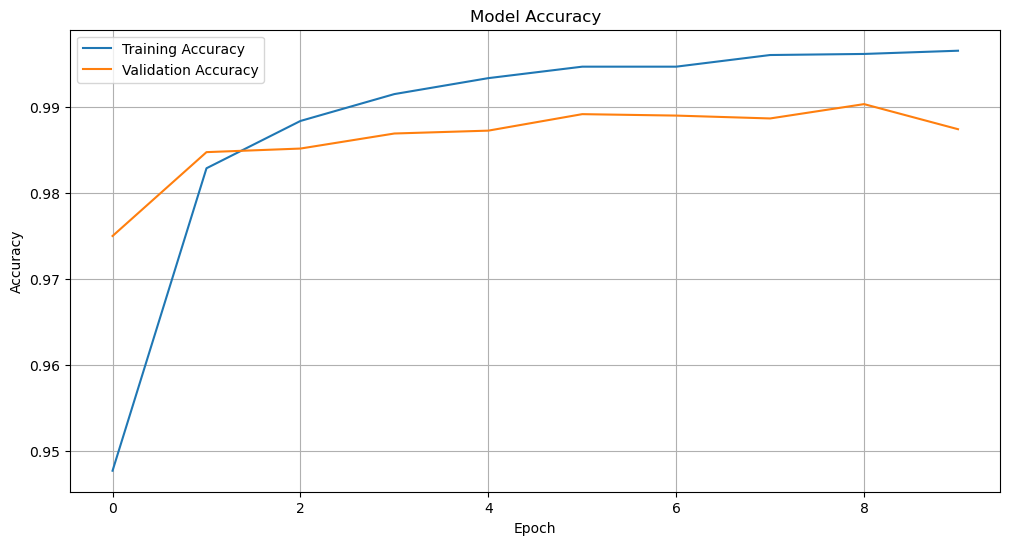

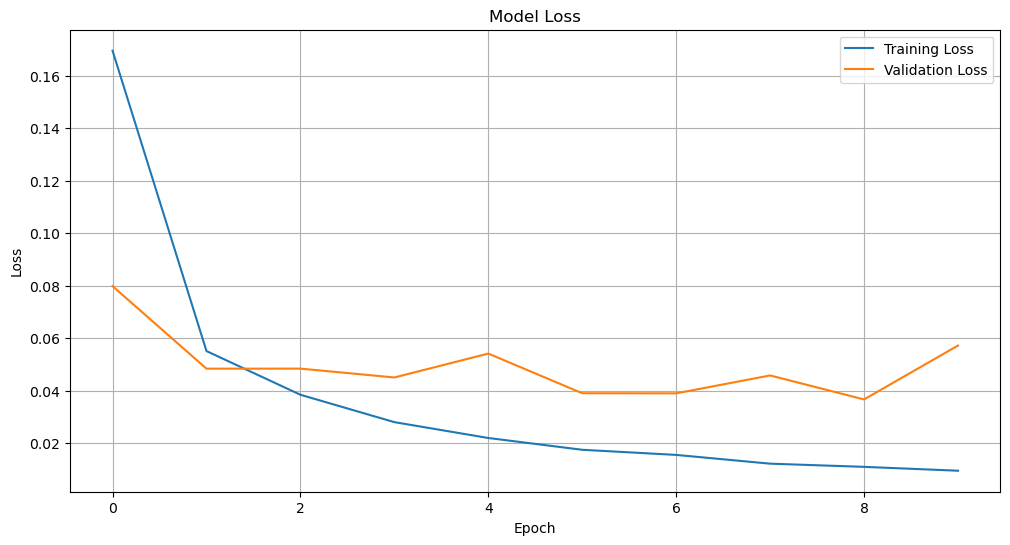

  Wavelet  Accuracy  Precision    Recall  F1 Score
0   coif1    0.9885   0.988580  0.988297  0.988415
1   coif2    0.9840   0.984631  0.983647  0.983944
2   coif3    0.9861   0.986278  0.985720  0.985907
3   coif4    0.9849   0.985094  0.984874  0.984764
4   coif5    0.9892   0.989162  0.989209  0.989149


In [15]:
import numpy as np
import pandas as pd
import pywt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Perform wavelet transform on the images
def apply_wavelet_transform(images, wavelet_func):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, wavelet_func)
        LL, (LH, HL, HH) = coeffs2
        transformed_images.append(LL)
    return np.array(transformed_images)

discrete_wavelets = [
    'coif1', 'coif2', 'coif3', 'coif4', 'coif5',
]

# Create lists to store results
wavelet_results = []
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

for wavelet_func in discrete_wavelets:
    print(f"Applying wavelet transform with '{wavelet_func}'...")
    x_train_transformed = apply_wavelet_transform(x_train, wavelet_func)
    x_test_transformed = apply_wavelet_transform(x_test, wavelet_func)

    # Normalize data
    x_train_transformed = x_train_transformed.astype('float32') / 255.0
    x_test_transformed = x_test_transformed.astype('float32') / 255.0

    # Step 2: Design CNN architecture
    model = Sequential([
        Input(shape=(x_train_transformed.shape[1], x_train_transformed.shape[2], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Step 3: Train the model
    history = model.fit(x_train_transformed, y_train, epochs=10, validation_split=0.2)

    # Step 4: Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_transformed, y_test, verbose=0)

    # Step 5: Calculate additional metrics
    y_pred_prob = model.predict(x_test_transformed)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results in lists
    wavelet_results.append(wavelet_func)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{wavelet_func} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{wavelet_func} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrame from the results
results_df = pd.DataFrame({
    'Wavelet': wavelet_results,
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1 Score': f1_results
})

# Print the results table
print(results_df)


## Wavelet Transform Using Biorthogonal and Reverse Biorthogonal Wavelets

Applying wavelet transform with 'bior1.1'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8618 - loss: 0.4716 - val_accuracy: 0.9733 - val_loss: 0.0904
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9779 - loss: 0.0712 - val_accuracy: 0.9788 - val_loss: 0.0678
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0483 - val_accuracy: 0.9842 - val_loss: 0.0517
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9893 - loss: 0.0365 - val_accuracy: 0.9853 - val_loss: 0.0497
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.9857 - val_loss: 0.0509
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0232 - val_accuracy: 0.9872 - val_loss: 0.0484
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9934 - loss: 0.0192 - val_accuracy: 0.9880 - val_loss: 0.0465
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 

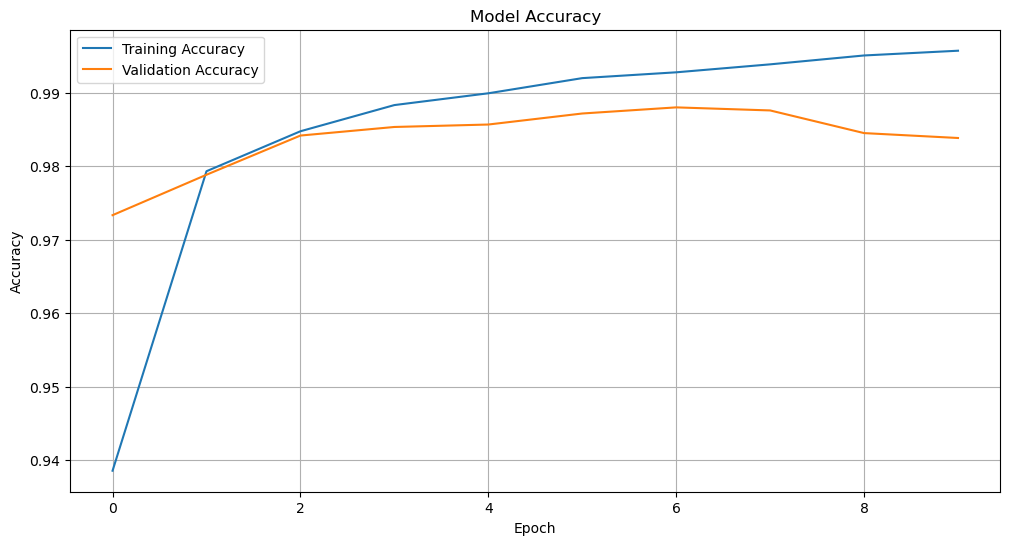

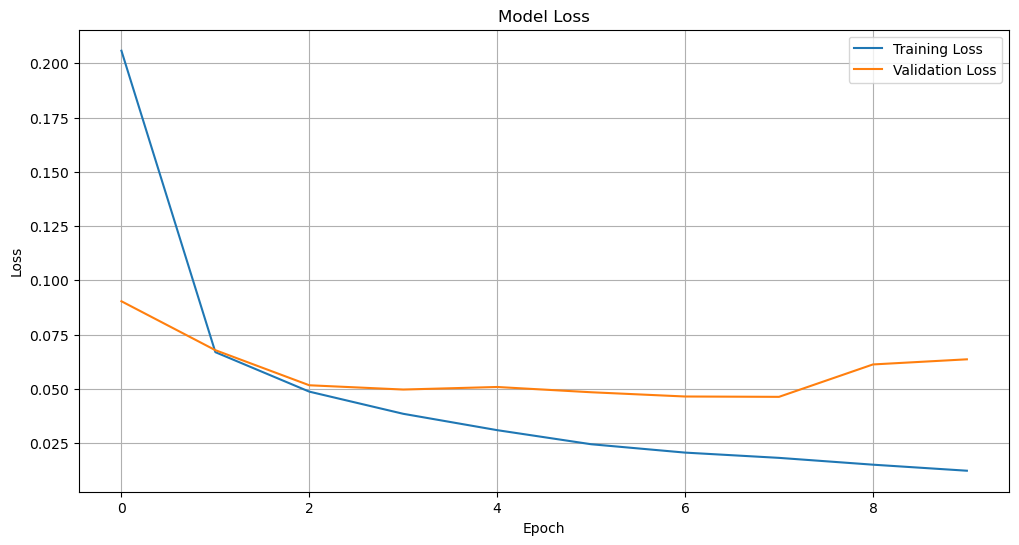

Applying wavelet transform with 'bior1.3'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8533 - loss: 0.4874 - val_accuracy: 0.9702 - val_loss: 0.0961
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9756 - loss: 0.0746 - val_accuracy: 0.9782 - val_loss: 0.0729
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0526 - val_accuracy: 0.9827 - val_loss: 0.0547
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9877 - loss: 0.0353 - val_accuracy: 0.9812 - val_loss: 0.0605
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0291 - val_accuracy: 0.9851 - val_loss: 0.0543
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9854 - val_loss: 0.0485
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9871 - val_loss: 0.0440
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 

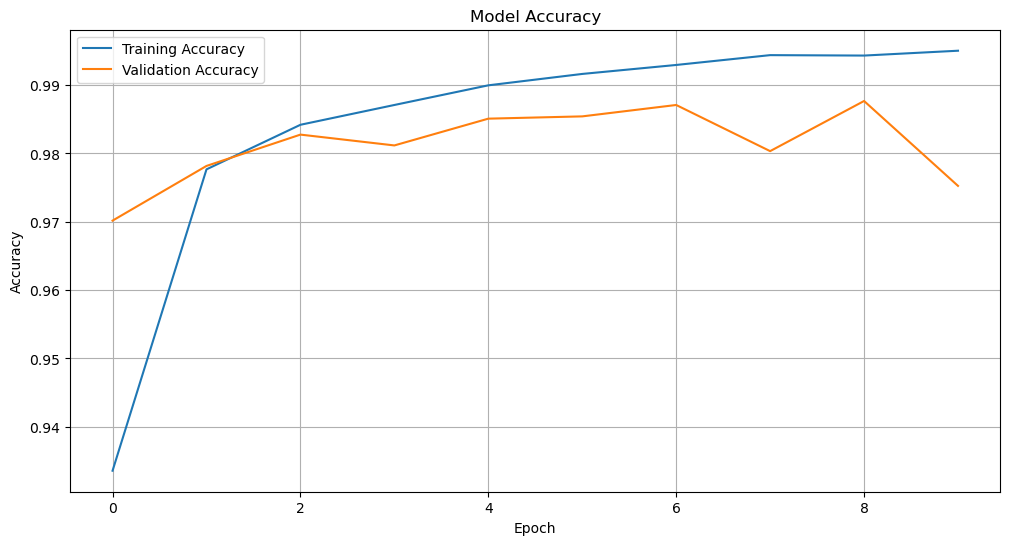

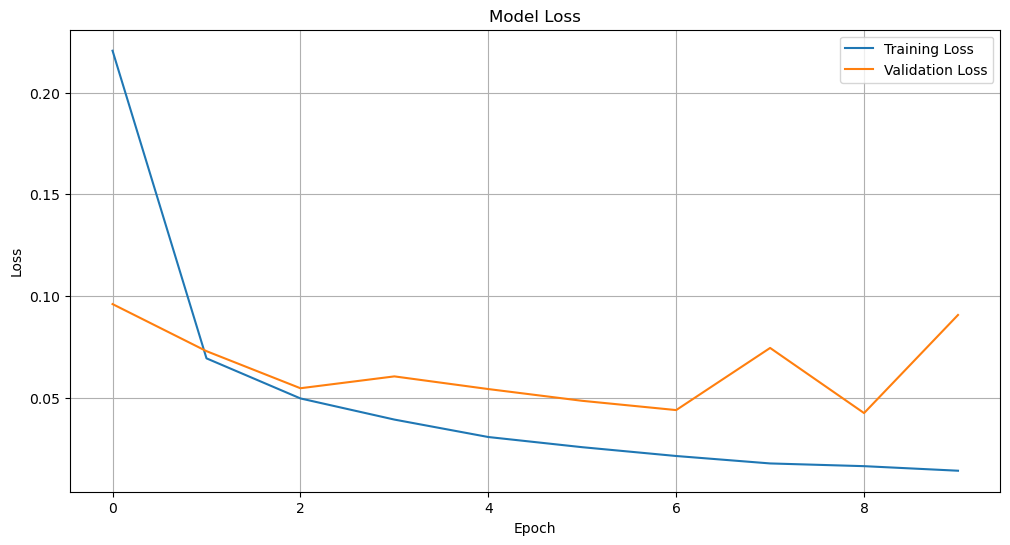

Applying wavelet transform with 'bior1.5'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8740 - loss: 0.4094 - val_accuracy: 0.9788 - val_loss: 0.0701
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9813 - loss: 0.0603 - val_accuracy: 0.9880 - val_loss: 0.0457
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9877 - val_loss: 0.0421
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9874 - val_loss: 0.0422
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9926 - loss: 0.0227 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9897 - val_loss: 0.0405
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9948 - loss: 0.0150 - val_accuracy: 0.9881 - val_loss: 0.0528
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s

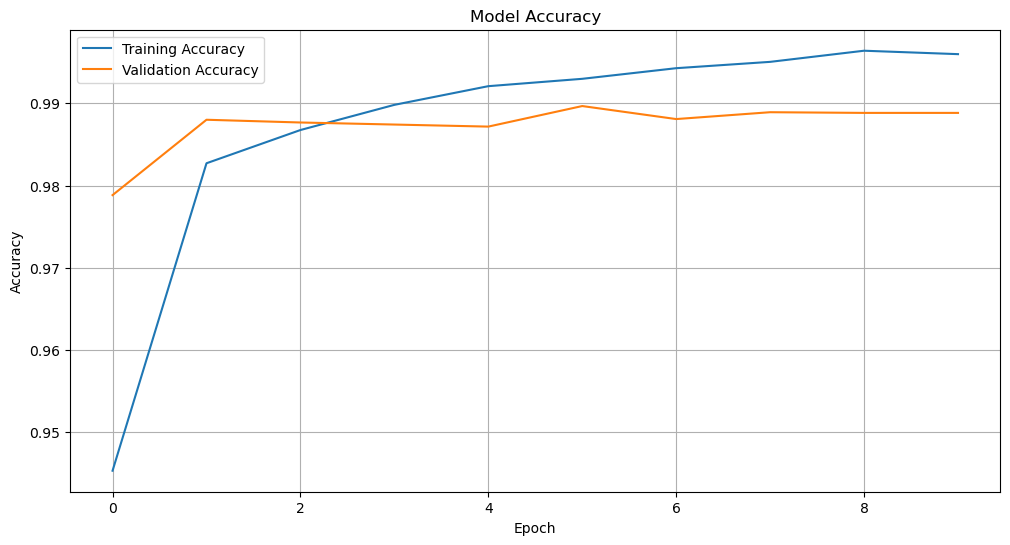

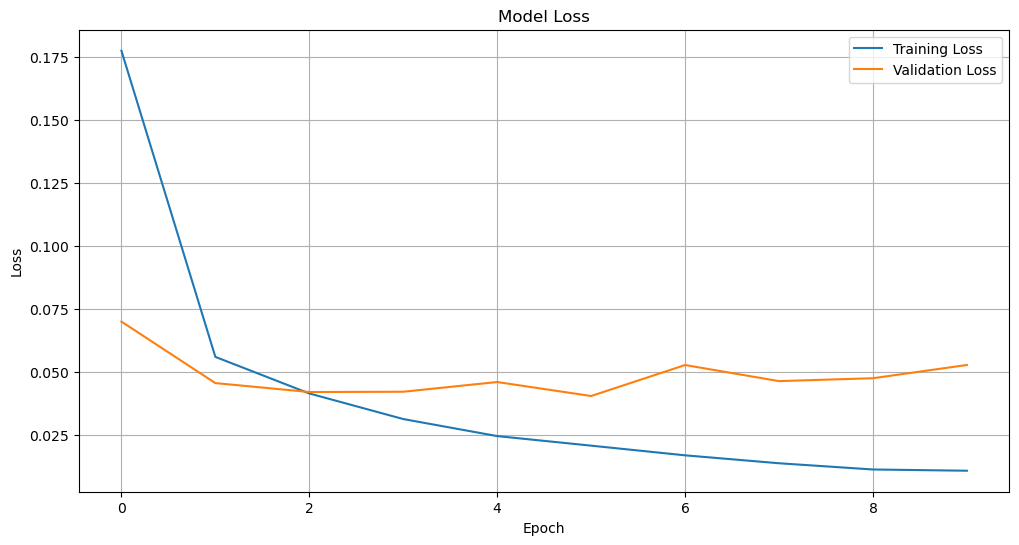

Applying wavelet transform with 'bior2.2'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8559 - loss: 0.4789 - val_accuracy: 0.9722 - val_loss: 0.0925
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9744 - loss: 0.0773 - val_accuracy: 0.9826 - val_loss: 0.0557
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9847 - val_loss: 0.0510
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9879 - loss: 0.0375 - val_accuracy: 0.9858 - val_loss: 0.0467
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9819 - val_loss: 0.0614
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9916 - loss: 0.0257 - val_accuracy: 0.9887 - val_loss: 0.0441
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9855 - val_loss: 0.0497
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━

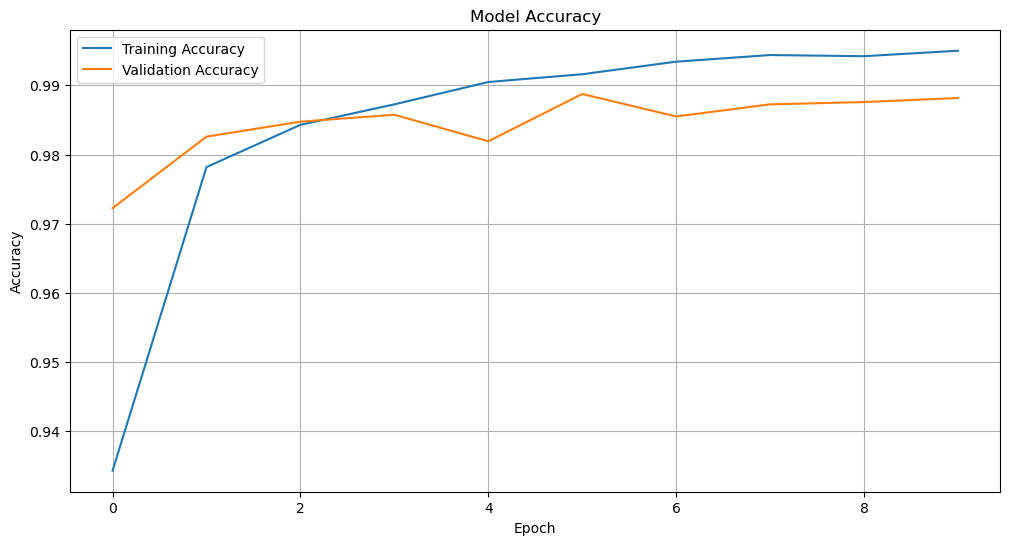

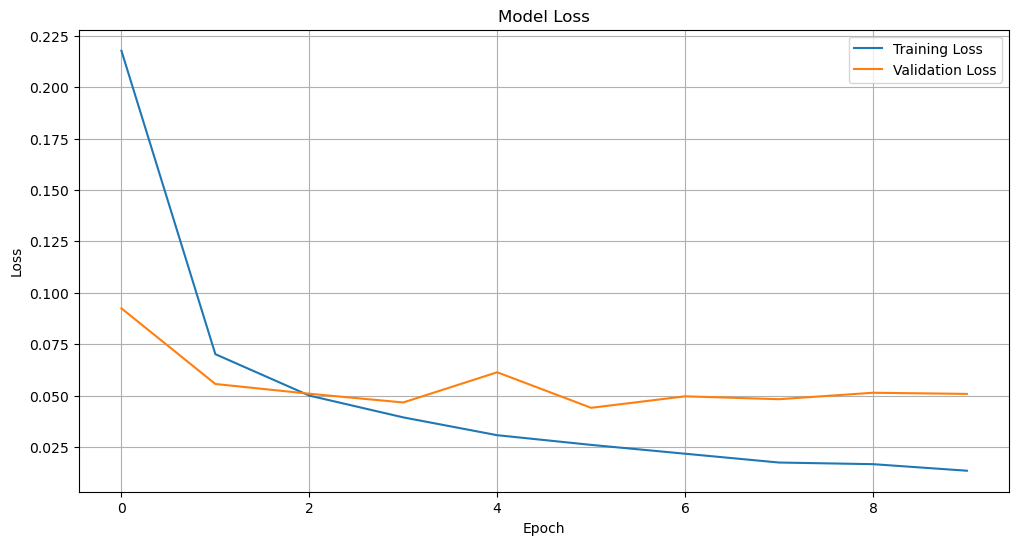

Applying wavelet transform with 'bior2.4'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8825 - loss: 0.3921 - val_accuracy: 0.9806 - val_loss: 0.0633
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9825 - loss: 0.0587 - val_accuracy: 0.9816 - val_loss: 0.0593
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9866 - loss: 0.0435 - val_accuracy: 0.9861 - val_loss: 0.0459
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9903 - loss: 0.0309 - val_accuracy: 0.9872 - val_loss: 0.0445
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9875 - val_loss: 0.0436
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9947 - loss: 0.0178 - val_accuracy: 0.9872 - val_loss: 0.0455
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9882 - val_loss: 0.0424
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━

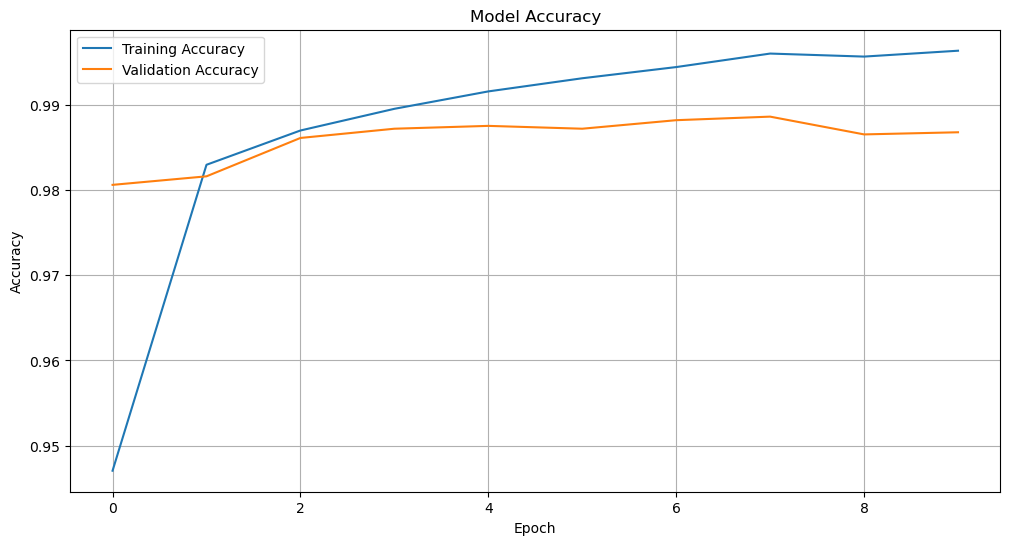

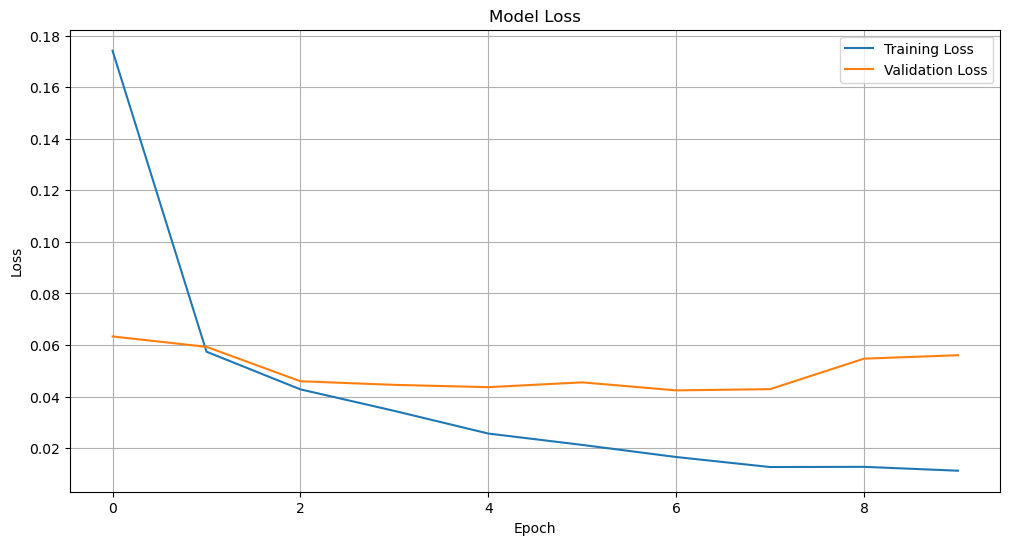

Applying wavelet transform with 'bior2.6'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8739 - loss: 0.4019 - val_accuracy: 0.9790 - val_loss: 0.0679
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9822 - loss: 0.0569 - val_accuracy: 0.9864 - val_loss: 0.0455
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9874 - loss: 0.0409 - val_accuracy: 0.9828 - val_loss: 0.0539
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9900 - loss: 0.0303 - val_accuracy: 0.9881 - val_loss: 0.0410
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.9896 - val_loss: 0.0354
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9946 - loss: 0.0158 - val_accuracy: 0.9884 - val_loss: 0.0408
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9952 - loss: 0.0145 - val_accuracy: 0.9862 - val_loss: 0.0562
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━

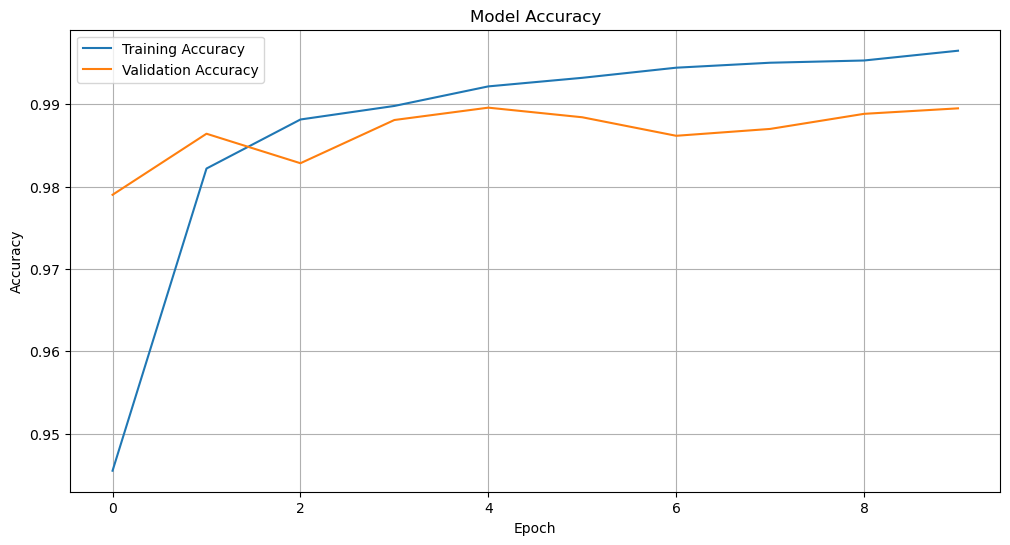

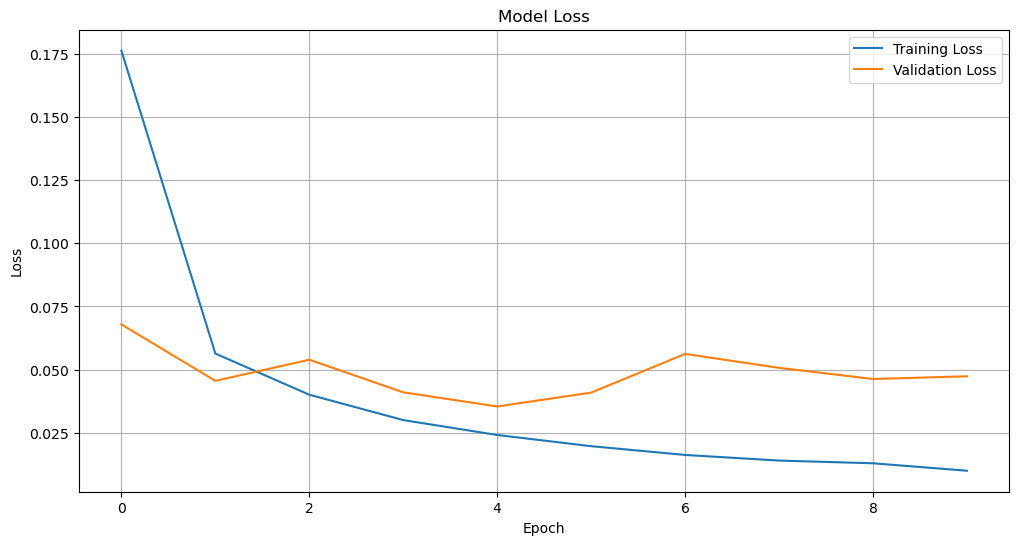

Applying wavelet transform with 'rbio1.1'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8607 - loss: 0.4669 - val_accuracy: 0.9790 - val_loss: 0.0772
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9776 - loss: 0.0717 - val_accuracy: 0.9824 - val_loss: 0.0598
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9843 - loss: 0.0489 - val_accuracy: 0.9808 - val_loss: 0.0656
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9885 - loss: 0.0374 - val_accuracy: 0.9827 - val_loss: 0.0618
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9898 - loss: 0.0332 - val_accuracy: 0.9838 - val_loss: 0.0554
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9843 - val_loss: 0.0574
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9925 - loss: 0.0217 - val_accuracy: 0.9861 - val_loss: 0.0499
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s

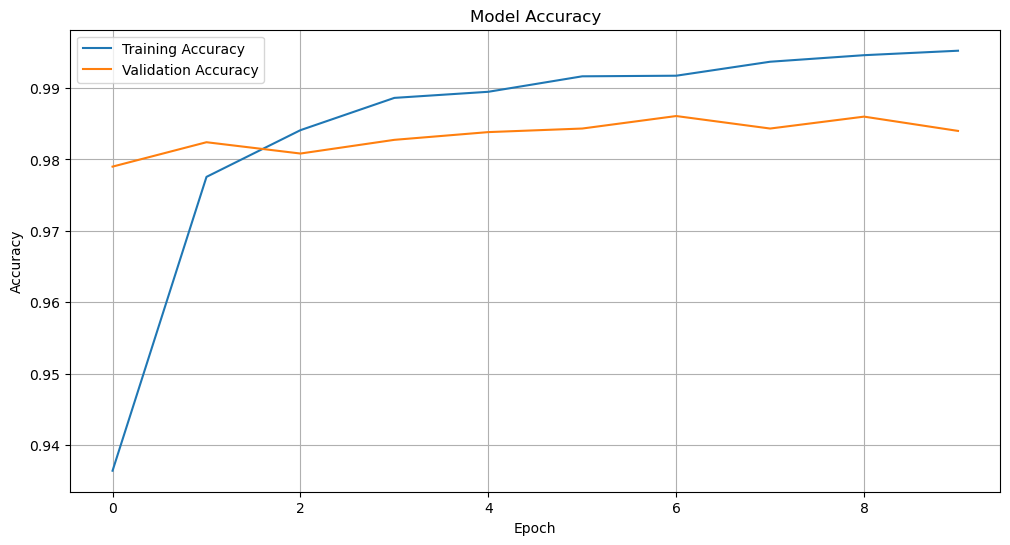

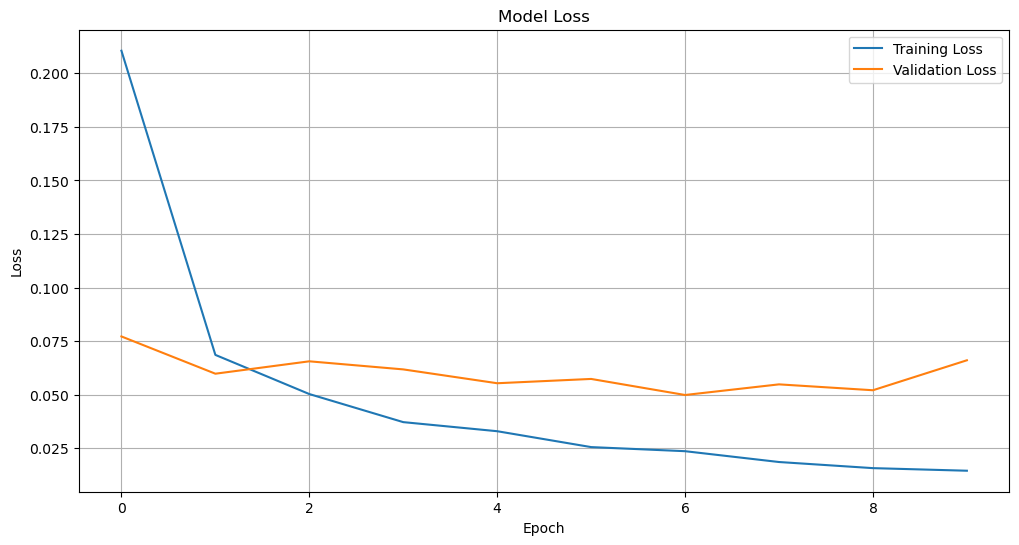

Applying wavelet transform with 'rbio1.3'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8618 - loss: 0.4849 - val_accuracy: 0.9785 - val_loss: 0.0718
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9764 - loss: 0.0736 - val_accuracy: 0.9790 - val_loss: 0.0725
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9849 - loss: 0.0492 - val_accuracy: 0.9826 - val_loss: 0.0597
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9853 - val_loss: 0.0487
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9868 - val_loss: 0.0491
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9847 - val_loss: 0.0623
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s

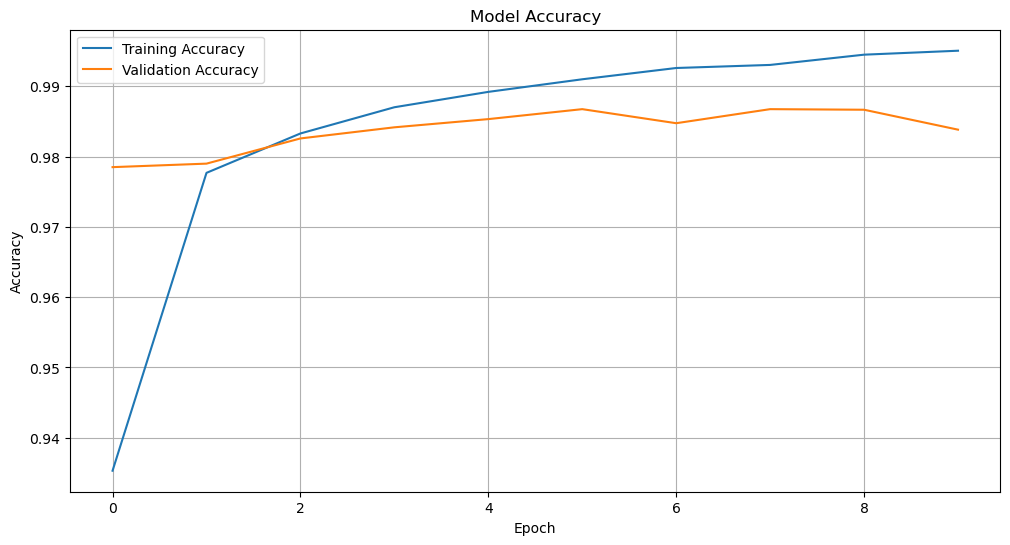

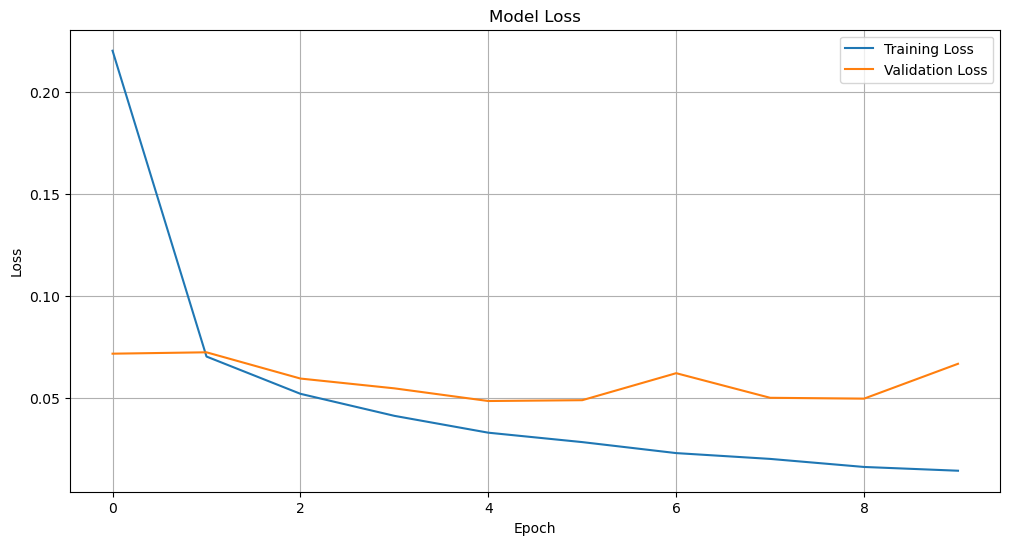

Applying wavelet transform with 'rbio1.5'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8750 - loss: 0.4271 - val_accuracy: 0.9747 - val_loss: 0.0864
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9788 - loss: 0.0691 - val_accuracy: 0.9801 - val_loss: 0.0621
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9842 - loss: 0.0514 - val_accuracy: 0.9887 - val_loss: 0.0443
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9880 - loss: 0.0381 - val_accuracy: 0.9875 - val_loss: 0.0425
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9866 - val_loss: 0.0478
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9862 - val_loss: 0.0464
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9941 - loss: 0.0178 - val_accuracy: 0.9872 - val_loss: 0.0497
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

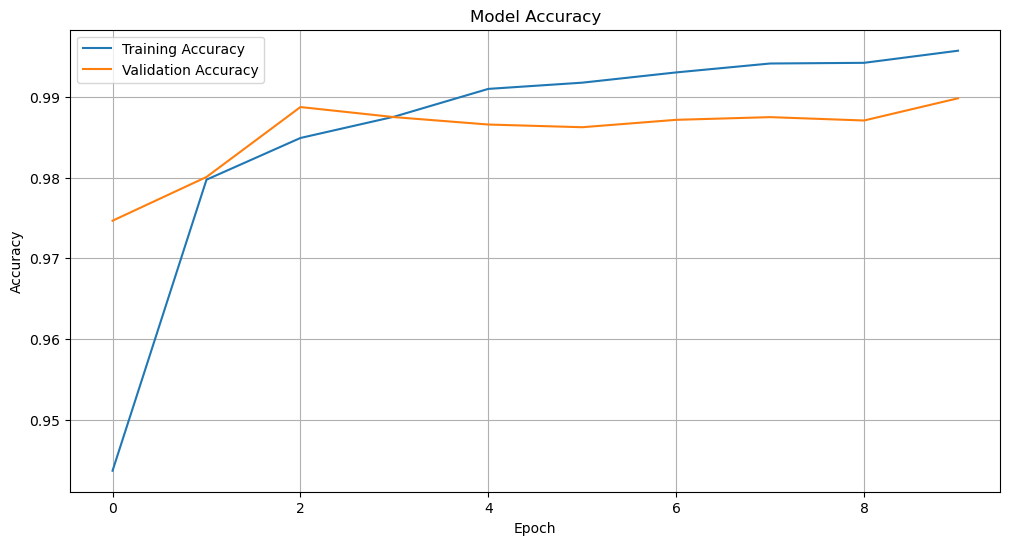

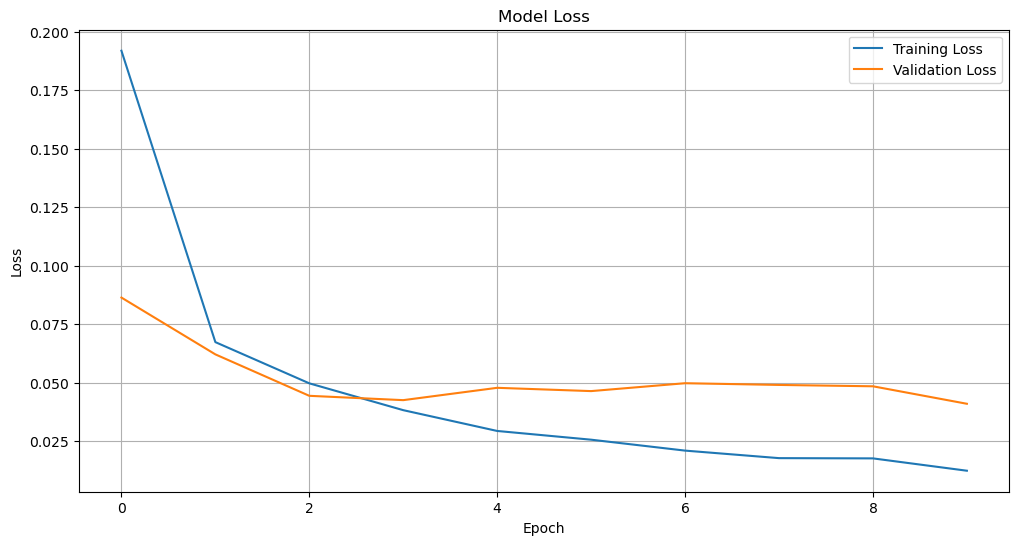

Applying wavelet transform with 'rbio2.2'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8597 - loss: 0.4840 - val_accuracy: 0.9729 - val_loss: 0.0904
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0791 - val_accuracy: 0.9794 - val_loss: 0.0687
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9842 - loss: 0.0503 - val_accuracy: 0.9840 - val_loss: 0.0536
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9874 - loss: 0.0381 - val_accuracy: 0.9838 - val_loss: 0.0548
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9899 - loss: 0.0326 - val_accuracy: 0.9843 - val_loss: 0.0533
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9872 - val_loss: 0.0449
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9932 - loss: 0.0207 - val_accuracy: 0.9864 - val_loss: 0.0503
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s

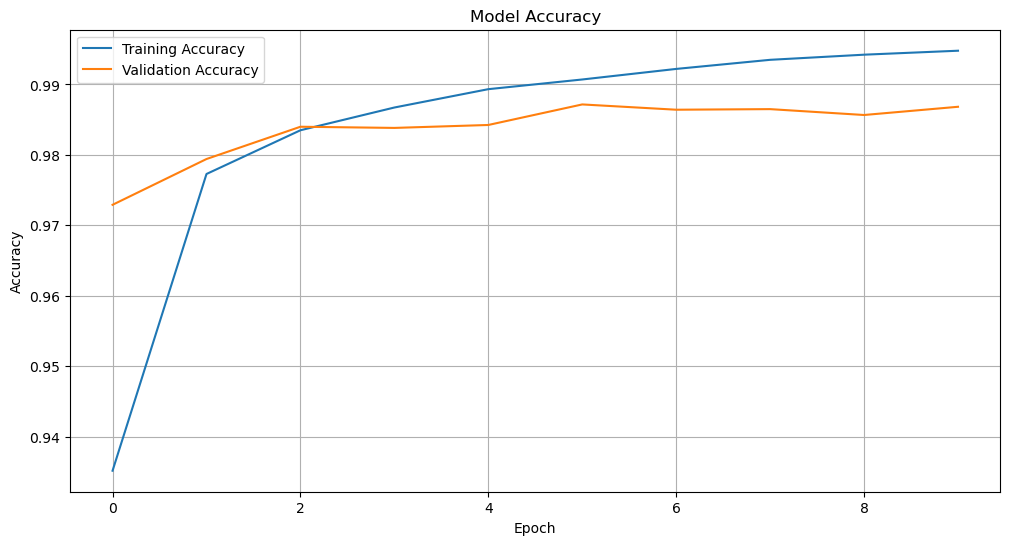

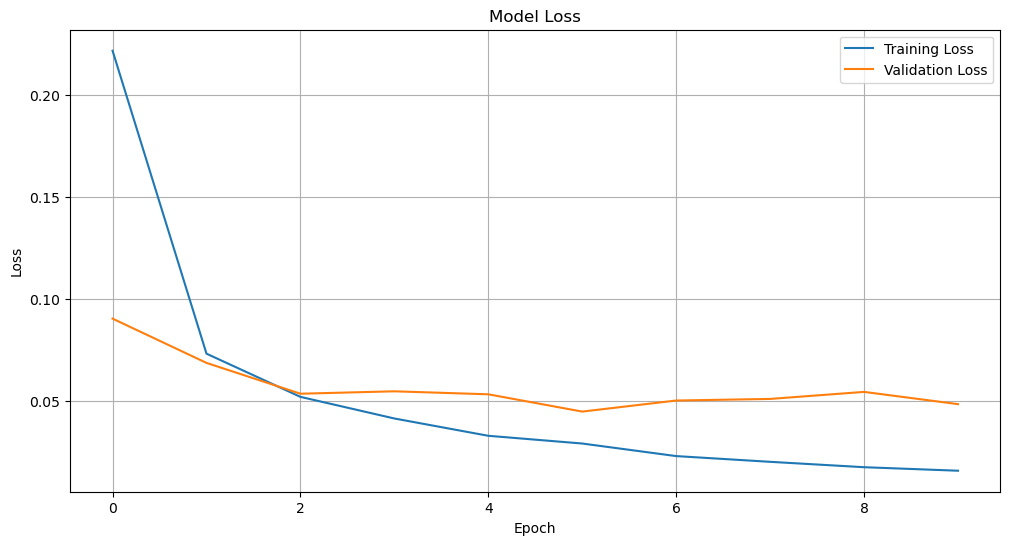

Applying wavelet transform with 'rbio2.4'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8737 - loss: 0.4263 - val_accuracy: 0.9763 - val_loss: 0.0771
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9782 - loss: 0.0739 - val_accuracy: 0.9824 - val_loss: 0.0606
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9839 - loss: 0.0481 - val_accuracy: 0.9827 - val_loss: 0.0609
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9881 - loss: 0.0365 - val_accuracy: 0.9857 - val_loss: 0.0471
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9865 - val_loss: 0.0414
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9871 - val_loss: 0.0450
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9943 - loss: 0.0192 - val_accuracy: 0.9864 - val_loss: 0.0466
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 

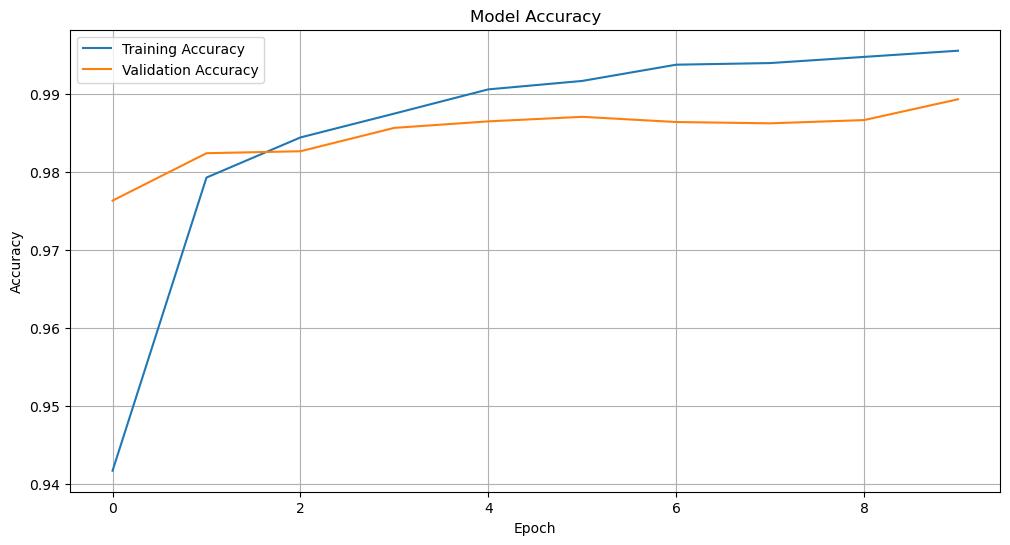

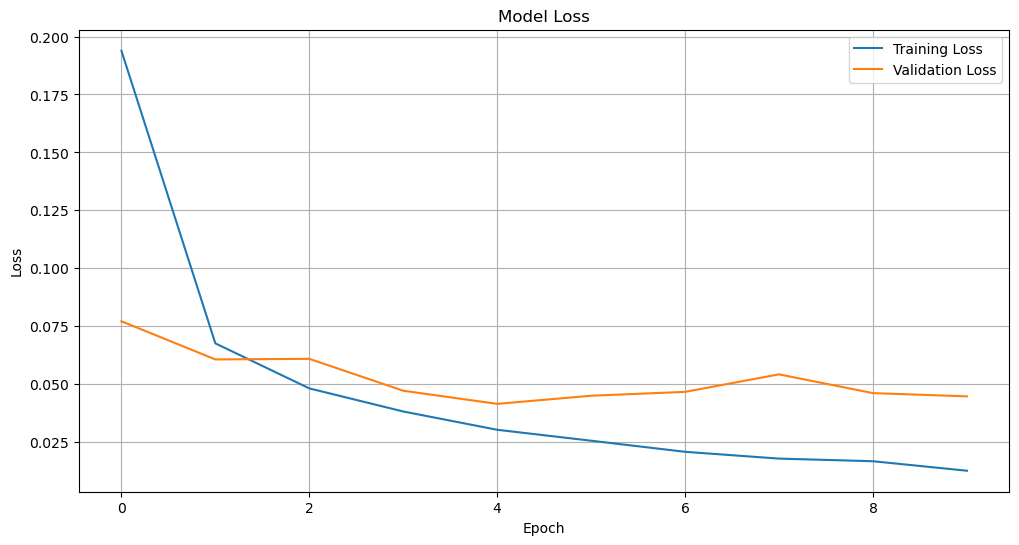

Applying wavelet transform with 'rbio2.6'...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8698 - loss: 0.4365 - val_accuracy: 0.9793 - val_loss: 0.0729
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9775 - loss: 0.0735 - val_accuracy: 0.9797 - val_loss: 0.0627
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9840 - loss: 0.0496 - val_accuracy: 0.9838 - val_loss: 0.0522
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9880 - val_loss: 0.0403
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9897 - loss: 0.0313 - val_accuracy: 0.9864 - val_loss: 0.0450
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9919 - loss: 0.0241 - val_accuracy: 0.9886 - val_loss: 0.0394
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9935 - loss: 0.0196 - val_accuracy: 0.9858 - val_loss: 0.0521
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━

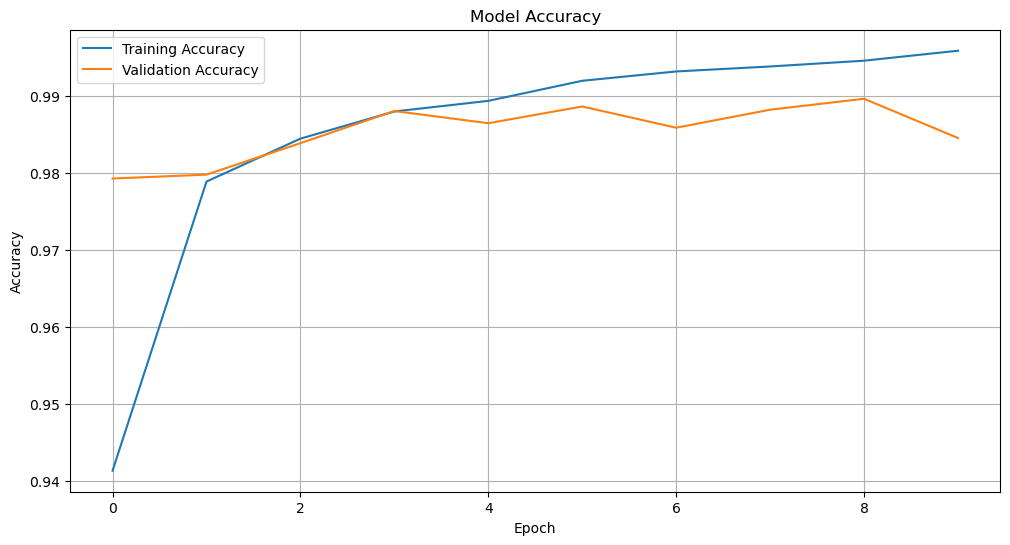

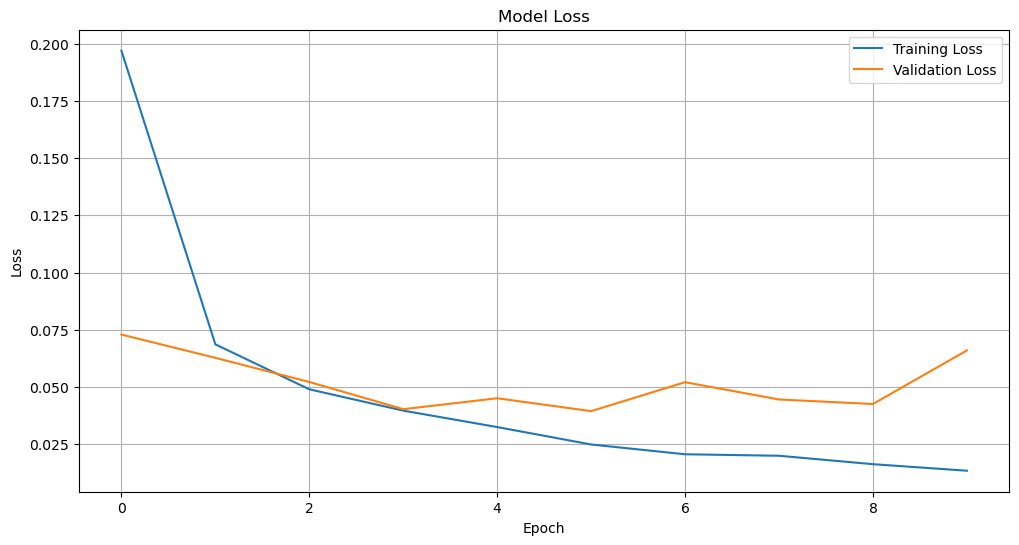

    Wavelet  Accuracy  Precision    Recall  F1 Score
0   bior1.1    0.9875   0.987632  0.987115  0.987326
1   bior1.3    0.9834   0.983981  0.983420  0.983419
2   bior1.5    0.9915   0.991417  0.991473  0.991422
3   bior2.2    0.9887   0.988835  0.988544  0.988679
4   bior2.4    0.9854   0.985246  0.985307  0.985178
5   bior2.6    0.9891   0.988949  0.989130  0.989014
6   rbio1.1    0.9863   0.986545  0.986221  0.986287
7   rbio1.3    0.9866   0.986645  0.986427  0.986488
8   rbio1.5    0.9898   0.989726  0.989672  0.989689
9   rbio2.2    0.9873   0.987398  0.987228  0.987272
10  rbio2.4    0.9910   0.990977  0.990889  0.990920
11  rbio2.6    0.9870   0.987224  0.986836  0.986932


In [16]:
import numpy as np
import pandas as pd
import pywt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Perform wavelet transform on the images
def apply_wavelet_transform(images, wavelet_func):
    transformed_images = []
    for img in images:
        coeffs2 = pywt.dwt2(img, wavelet_func)
        LL, (LH, HL, HH) = coeffs2
        transformed_images.append(LL)
    return np.array(transformed_images)

discrete_wavelets = [
    'bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6',
    'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6',
]

# Create lists to store results
wavelet_results = []
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

for wavelet_func in discrete_wavelets:
    print(f"Applying wavelet transform with '{wavelet_func}'...")
    x_train_transformed = apply_wavelet_transform(x_train, wavelet_func)
    x_test_transformed = apply_wavelet_transform(x_test, wavelet_func)

    # Normalize data
    x_train_transformed = x_train_transformed.astype('float32') / 255.0
    x_test_transformed = x_test_transformed.astype('float32') / 255.0

    # Step 2: Design CNN architecture
    model = Sequential([
        Input(shape=(x_train_transformed.shape[1], x_train_transformed.shape[2], 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Step 3: Train the model
    history = model.fit(x_train_transformed, y_train, epochs=10, validation_split=0.2)

    # Step 4: Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_transformed, y_test, verbose=0)

    # Step 5: Calculate additional metrics
    y_pred_prob = model.predict(x_test_transformed)
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Store results in lists
    wavelet_results.append(wavelet_func)
    accuracy_results.append(accuracy)
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{wavelet_func} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{wavelet_func} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create DataFrame from the results
results_df = pd.DataFrame({
    'Wavelet': wavelet_results,
    'Accuracy': accuracy_results,
    'Precision': precision_results,
    'Recall': recall_results,
    'F1 Score': f1_results
})

# Print the results table
print(results_df)
